# **Tesla Stock Analysis**

## Team Members

* Yamini Manral
* Divyav Dubey
* Ajin Abraham
* Siddhi Sawant
* Anshul Singh


# Stock analysis of TSLA

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import scipy.stats as ss
from scipy.optimize import minimize
from pandas_datareader import DataReader
from pandas_datareader import data as pdr
import seaborn as sns
from datetime import datetime
import yfinance as yf
from scipy.stats import norm
from functools import reduce
from scipy.stats import pearsonr
# import getFamaFrenchFactors as gff
# from fredapi import Fred

In [ ]:
# Define the start and end dates
start_date = datetime(2020,1,1)
end_date = datetime(2023,11,30)

tsla_df = pd.DataFrame()

# Get the stock data
df = yf.download('TSLA', start_date, end_date)
tsla_df = pd.concat([tsla_df, df])
tsla_df.index = pd.to_datetime(tsla_df.index)
tsla_df.index = tsla_df.index.date
tsla_df.index.name = 'Date'

[*********************100%%**********************]  1 of 1 completed


In [ ]:
summary_stats = tsla_df.describe().apply(lambda s: s.apply('{0:.5f}'.format))
summary_stats

,Open,High,Low,Close,Adj Close,Volume
count,985.00000,985.00000,985.00000,985.00000,985.00000,985.00000
mean,208.39614,213.16096,203.23849,208.32314,208.32314,133595363.45178
std,86.71322,88.44057,84.67631,86.52256,86.52256,89490229.55652
min,24.98000,26.99067,23.36733,24.08133,24.08133,29401800.00000
25%,153.39000,160.48000,147.83333,153.75000,153.75000,76210500.00000
50%,222.73666,226.99001,216.78000,221.99667,221.99667,107017200.00000
75%,265.00000,269.07999,259.89001,264.51001,264.51001,159770800.00000
max,411.47000,414.49667,405.66666,409.97000,409.97000,914082000.00000


## Comparing TSLA with competitor stocks

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


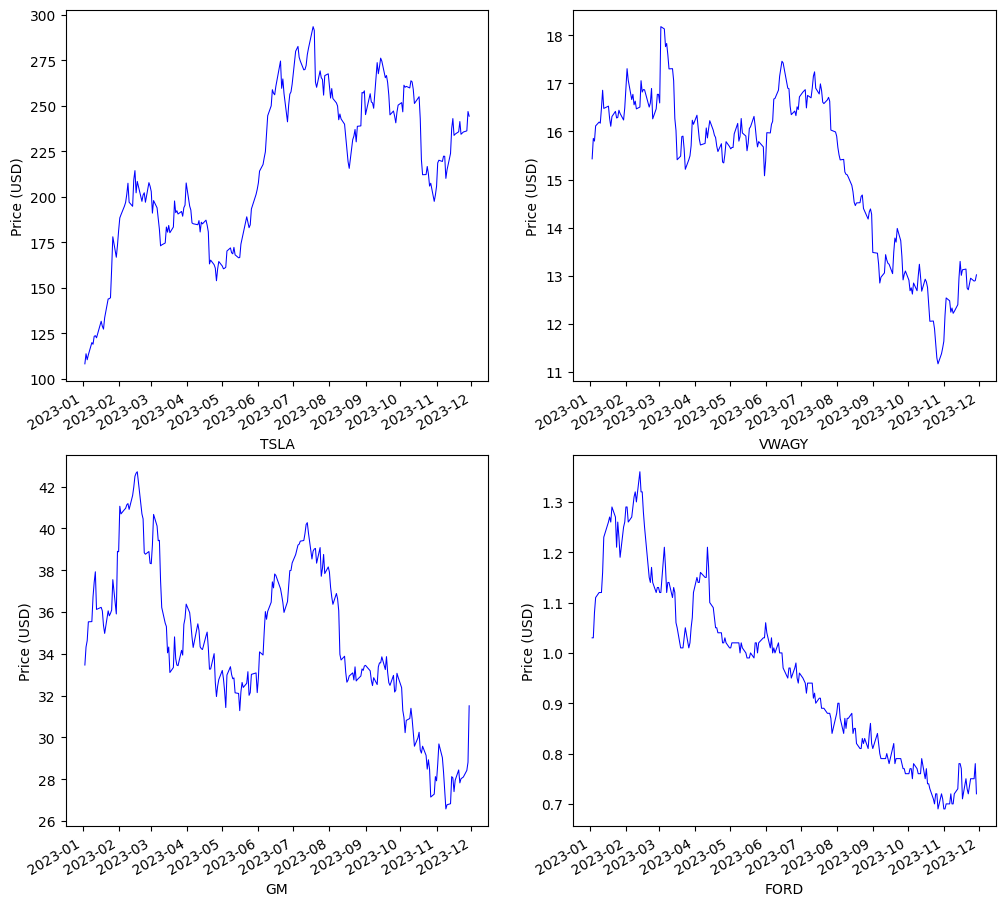

In [ ]:
# Set the figure size for the plots
plt.figure(figsize=(12, 12))
comp = ['TSLA','VWAGY','GM','FORD']

# Loop through each company ticker symbol in the list
for i, company in enumerate(comp, 1):
    # Create subplots within the figure
    plt.subplot(2, 2, i)

    # Download stock data for the current company within a specified date range
    STOCK = yf.download(company, start='2023-01-01', end='2023-11-30')

    # Plot the 'Adjusted Close' prices for the stock
    STOCK['Adj Close'].plot(linewidth=0.75, color='blue')

    # Set labels for the y-axis and x-axis
    plt.ylabel("Price (USD)")
    plt.xlabel(company)


# Display the plots
plt.show()


In [ ]:
# Define start and end dates using datetime
start_date = datetime(2023, 1, 1)  # Start date: January 1, 2023
end_date = datetime(2023, 11, 30)

STOCK = yf.download('TSLA', start=start_date, end=end_date)

# Extract 'Adj Close' prices and store them in variable X
X = STOCK['Adj Close'].values
X

[*********************100%%**********************]  1 of 1 completed


array([108.09999847, 113.63999939, 110.33999634, 113.05999756,
       119.76999664, 118.84999847, 123.22000122, 123.55999756,
       122.40000153, 131.49000549, 128.77999878, 127.16999817,
       133.41999817, 143.75      , 143.88999939, 144.42999268,
       160.27000427, 177.8999939 , 166.66000366, 173.22000122,
       181.41000366, 188.27000427, 189.97999573, 194.75999451,
       196.80999756, 201.28999329, 207.32000732, 196.88999939,
       194.63999939, 209.25      , 214.24000549, 202.03999329,
       208.30999756, 197.36999512, 200.86000061, 202.07000732,
       196.88000488, 207.63000488, 205.71000671, 202.77000427,
       190.8999939 , 197.78999329, 193.80999756, 187.71000671,
       182.        , 172.91999817, 173.44000244, 174.47999573,
       183.25999451, 180.44999695, 184.13000488, 180.13000488,
       183.25      , 197.58000183, 191.1499939 , 192.22000122,
       190.41000366, 191.80999756, 189.19000244, 193.88000488,
       195.27999878, 207.46000671, 194.77000427, 192.58

## Mean, Variance, Standard Deviation, Skewness and Kurtosis

In [ ]:
# Calculate the mean, variance, standard deviation and skewness of the data in variable X
mean = np.mean(X)
variance = np.var(X)
std = np.std(X)
skewness = ss.skew(X)
# Calculate the kurtosis of the data in variable X
kurtosis = ss.kurtosis(X, axis=0, bias=True)+3

#Display
print(f"Mean: {mean:.6f}")
print(f"Variance: {variance:.6f}")
print(f"Std Dev: {std:.6f}")
print(f"Skewness: {skewness:.6f}")
print(f"Kurtosis: {kurtosis:.6f}")

Mean: 214.785895
Variance: 1819.000293
Std Dev: 42.649740
Skewness: -0.379325
Kurtosis: 2.396004


## Kernel Density Plots

count    229.000000
mean     214.785895
std       42.743167
min      108.099998
25%      184.509995
50%      214.649994
75%      251.919998
max      293.339996
Name: Adj Close, dtype: float64

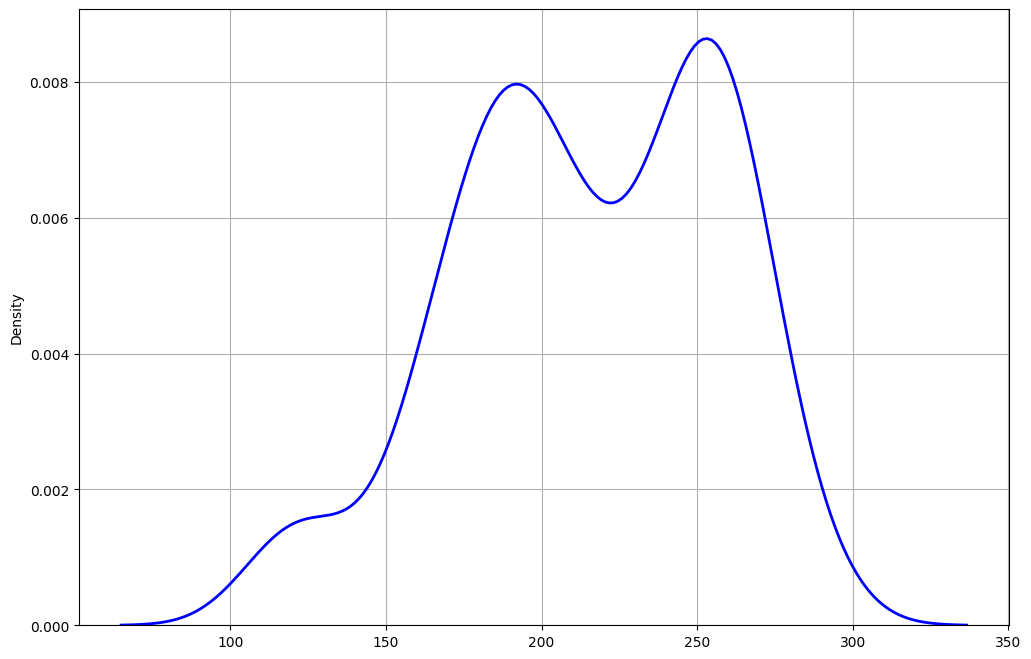

In [ ]:
# Display a grid on the plot
plt.grid(1)

# Create a kernel density estimate (KDE) plot for the data in variable X
# KDE plot is a smoothed representation of the data's distribution
sns.kdeplot(data=X, linewidth=2, color='blue')

# Display descriptive statistics for the 'Adj Close' prices of the stock data
STOCK['Adj Close'].describe()

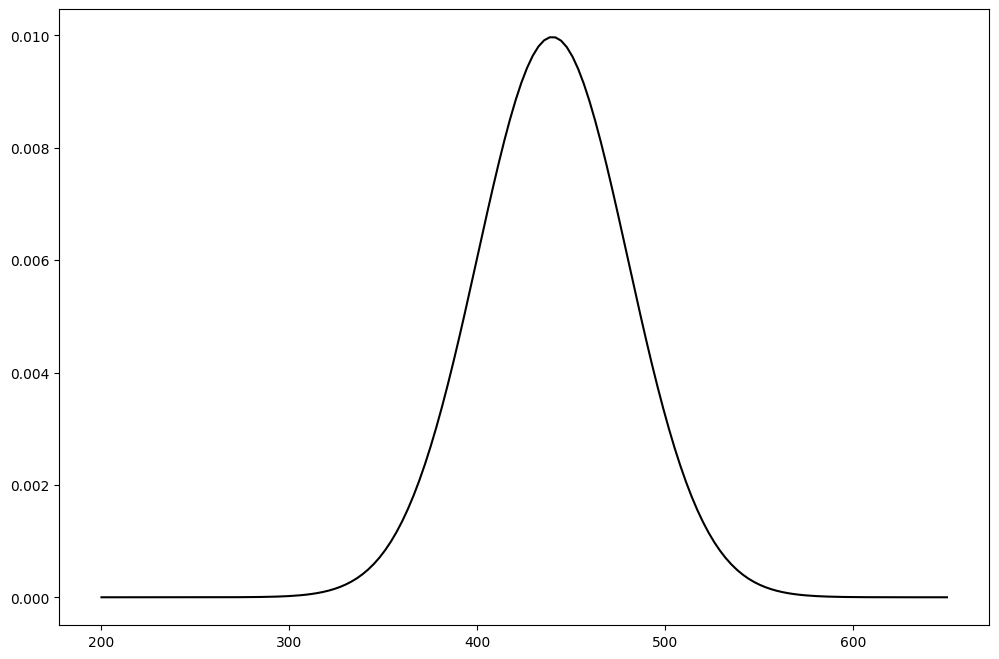

In [ ]:
# Generate a random number from a standard normal distribution
u = np.random.normal(0, 1, 1)

# Set parameters for the normal distribution
mu_1 = 440  # Mean of the distribution
Sigma1 = 1600  # Variance of the distribution

# Calculate a random variable following a normal distribution
r1 = mu_1 + math.sqrt(Sigma1) * u

# Calculate the standard deviation of the distribution
sigma_1 = math.sqrt(Sigma1)

# Create an array of values in a specified range for x-axis
x_1 = np.linspace(200, 650, 150)

# Calculate the probability density function (PDF) values for the normal distribution
y_1 = ss.norm.pdf(x_1, mu_1, sigma_1)
plt.figure(2)
plt.plot(x_1, y_1,color='black')

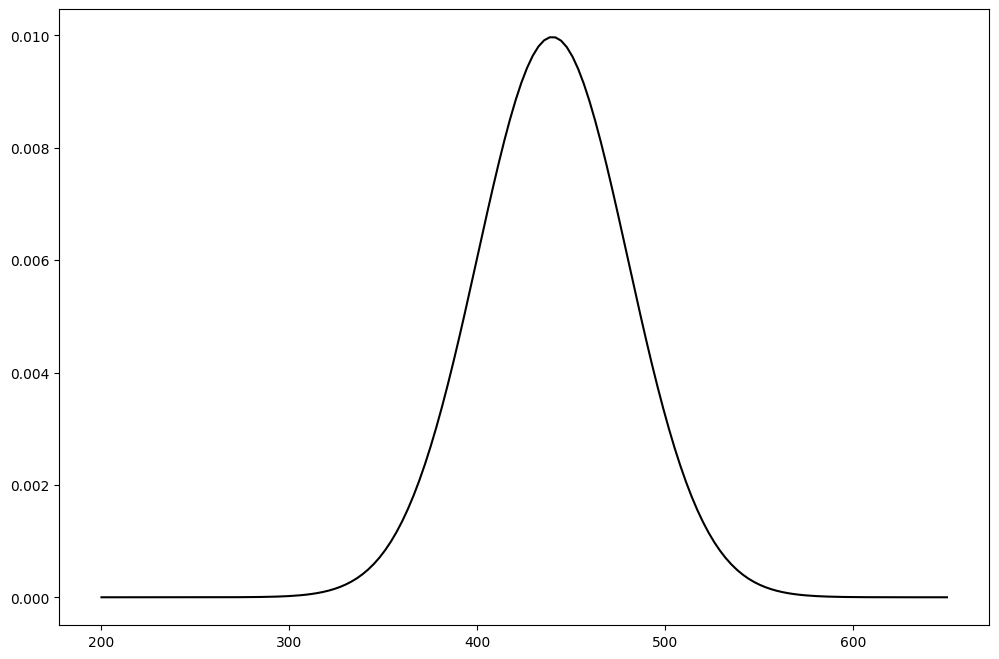

In [ ]:
# Set parameters for the second normal distribution
mu_2 = 560  # Mean of the distribution
Sigma2 = 900  # Variance of the distribution

# Calculate a random variable following a normal distribution for the second distribution
r2 = mu_2 + math.sqrt(Sigma2) * u

# Calculate the standard deviation of the second distribution
sigma_2 = math.sqrt(Sigma2)

# Create an array of values in a specified range for x-axis (same range as before)
x_2 = np.linspace(200, 650, 150)

# Calculate the probability density function (PDF) values for the second normal distribution
y_2 = ss.norm.pdf(x_2, mu_2, sigma_2)

plt.figure(3)
plt.plot(x_2, y_1,color='black')

<Axes: ylabel='Density'>

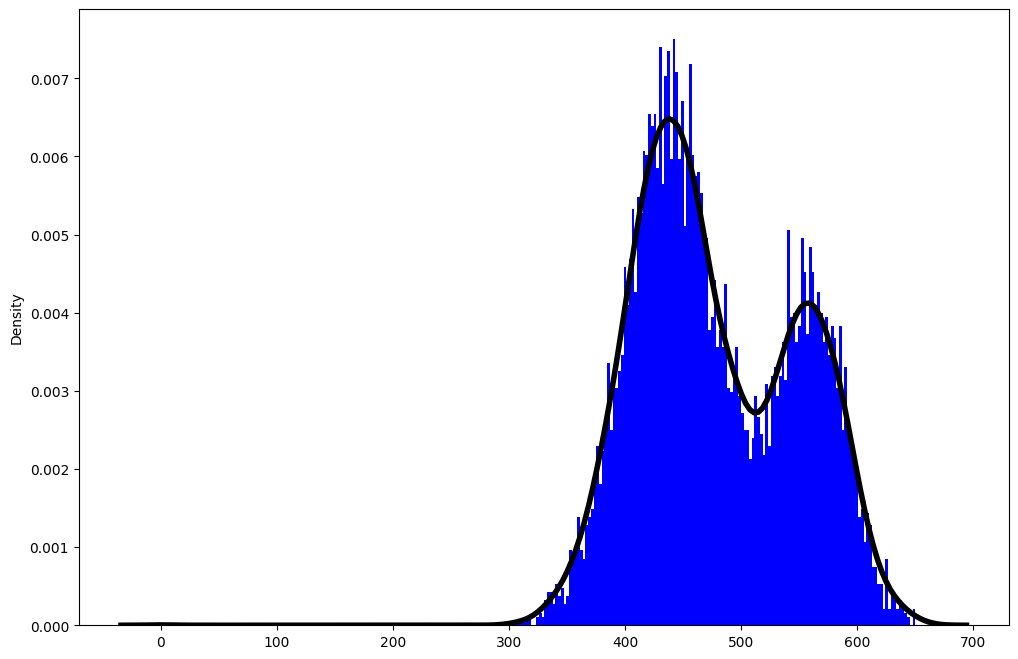

In [ ]:
# Given probability and number of simulations
p = 0.68  # Probability threshold
S = 8000  # Number of simulations

# Initialize arrays to store results
r = np.zeros(S)  # Array to store simulated results
y = np.zeros(S)  # Placeholder array

# Simulation loop
for s in range(1, S):
    eps = np.random.normal(0, 1, 1)  # Generate a random number from a standard normal distribution

    # Calculate random variables following normal distributions
    r1 = mu_1 + math.sqrt(Sigma1) * eps
    r2 = mu_2 + math.sqrt(Sigma2) * eps

    u = np.random.uniform(0, 1, 1)  # Generate a random number from a uniform distribution

    # Simulate the mixed random variable based on a probability threshold
    r[s] = r1 * (u < p) + r2 * (u >= p)

# Create a new figure for the plot
plt.figure(5)

# Plot a histogram of the simulated values with specified bins, color, and density
plt.hist(r, bins=np.linspace(300, 650, 150), color='blue', density=True)

# Overlay a kernel density estimate (KDE) plot on the histogram for visualizing the distribution
sns.kdeplot(data=r, linewidth=4, color='black')

In [ ]:
mean_val = np.mean(X)
std_val = np.std(X)
skew_val = ss.skew(X)
kurtosis_val = ss.kurtosis(X, axis=0, bias=True)+3

# Create a DataFrame with summary statistics
summary_stats = pd.DataFrame({
    'Mean': [mean_val],
    'Std': [std_val],
    'Skewness': [skew_val],
    'Kurtosis': [kurtosis_val]
})
summary_stats.columns = ['Mean', 'Standard Deviation', 'Skewness', 'Kurtosis']
print(summary_stats)


         Mean  Standard Deviation  Skewness  Kurtosis
0  214.785895            42.64974 -0.379325  2.396004


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


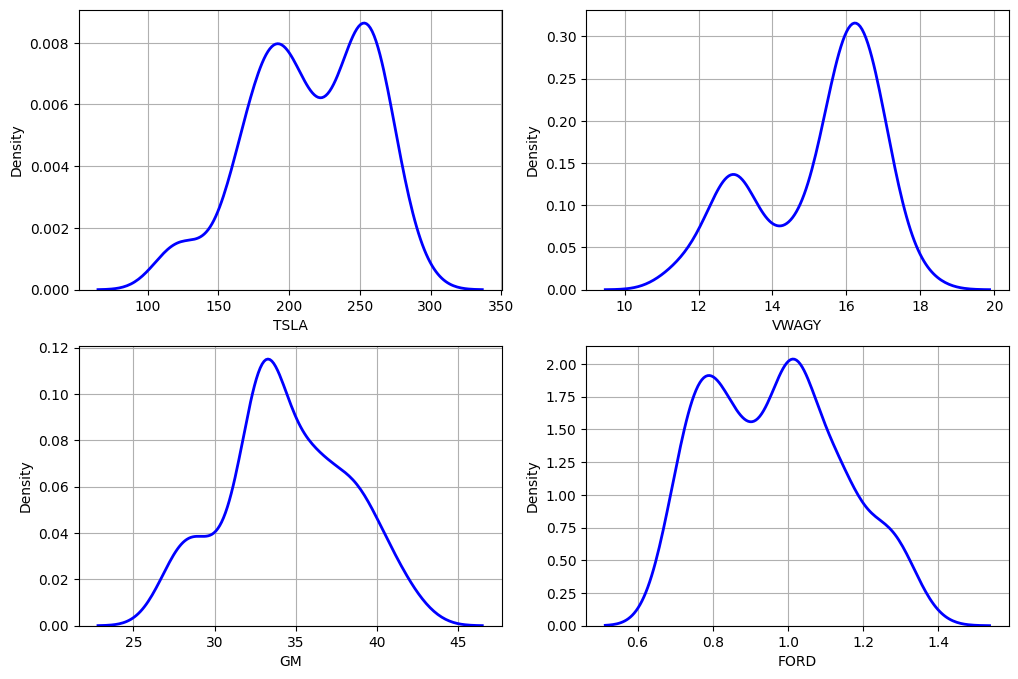

In [ ]:
# Set figure size for plots
plt.rcParams['figure.figsize'] = (12,8)

# Create subplots for each company in the list 'comp'
for i, company in enumerate(comp, 1):
    plt.subplot(2, 2, i)
     # Download stock data for the current company within the specified date range
    STOCK = yf.download(company,start_date ,end_date)
    X = STOCK['Adj Close'].values
    plt.grid(1)
    sns.kdeplot(data=X,color='blue',linewidth=2)
    plt.xlabel(company)

In [ ]:
tsla_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500
...,...,...,...,...,...,...
2023-11-22,242.039993,244.009995,231.399994,234.210007,234.210007,117950600
2023-11-24,233.750000,238.750000,232.330002,235.449997,235.449997,65125200
2023-11-27,236.889999,238.330002,232.100006,236.080002,236.080002,112031800


## Histogram plotting

In [ ]:
comp = ['TSLA','VWAGY','GM','FORD']
tsla_df = pd.DataFrame()

# Loop through each company ticker symbol in the list 'comp'
for company in comp:
    # Get the stock data
    df = yf.download(company, start_date, end_date)
    df['Company'] = company
    tsla_df = pd.concat([tsla_df, df])
# Convert the index to datetime format and extract only the date part
tsla_df.index = pd.to_datetime(tsla_df.index)
tsla_df.index = tsla_df.index.date
tsla_df.index.name = 'Date'

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
# group the dataframe and calulate the sum
tsla_df.groupby('Company').sum()

,Open,High,Low,Close,Adj Close,Volume
Company,,,,,,
FORD,221.529999,226.679998,216.449999,220.689999,220.689999,4962600
GM,7951.310001,8056.289993,7843.789963,7948.859985,7896.170259,3422642600
TSLA,49084.280045,50138.250031,48066.889954,49185.969925,49185.969925,31903604700
VWAGY,3574.496990,3597.608994,3548.139003,3572.542998,3487.179182,56786400


Company
FORD     [[Axes(0.125,0.666111;0.336957x0.213889), Axes...
GM       [[Axes(0.125,0.666111;0.336957x0.213889), Axes...
TSLA     [[Axes(0.125,0.666111;0.336957x0.213889), Axes...
VWAGY    [[Axes(0.125,0.666111;0.336957x0.213889), Axes...
dtype: object

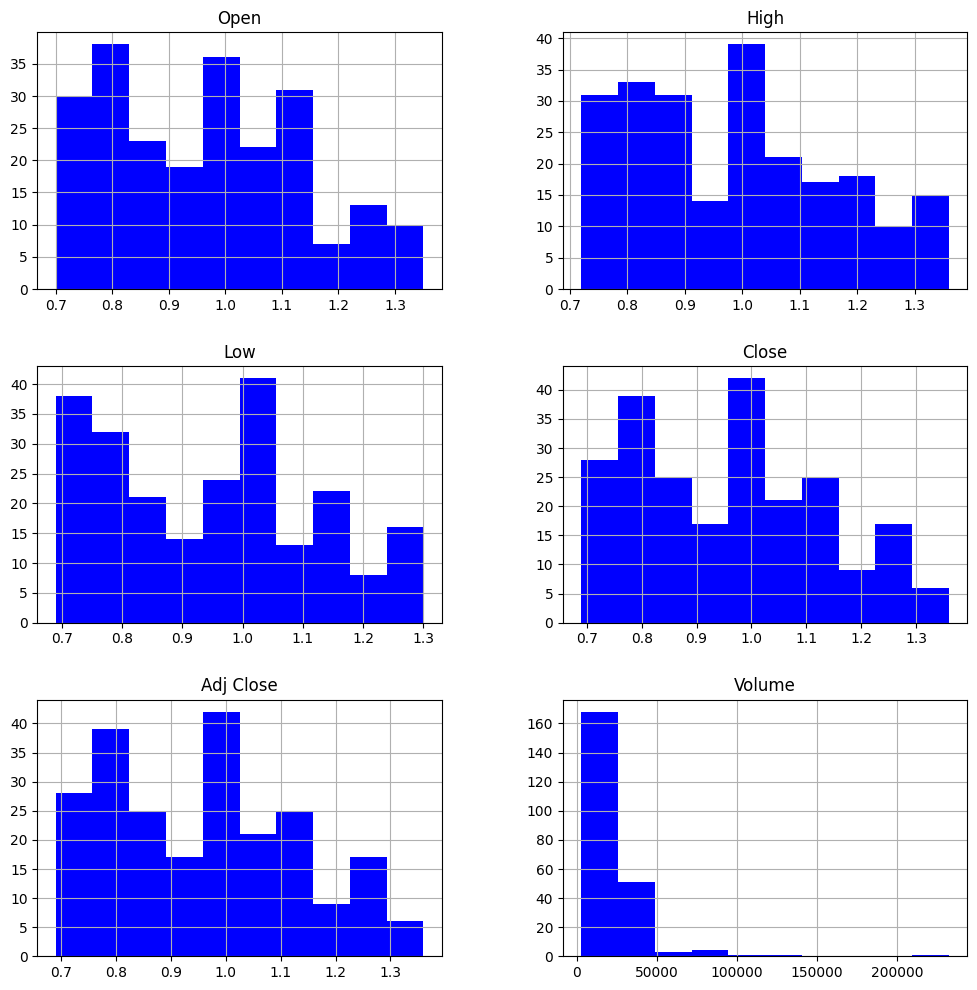

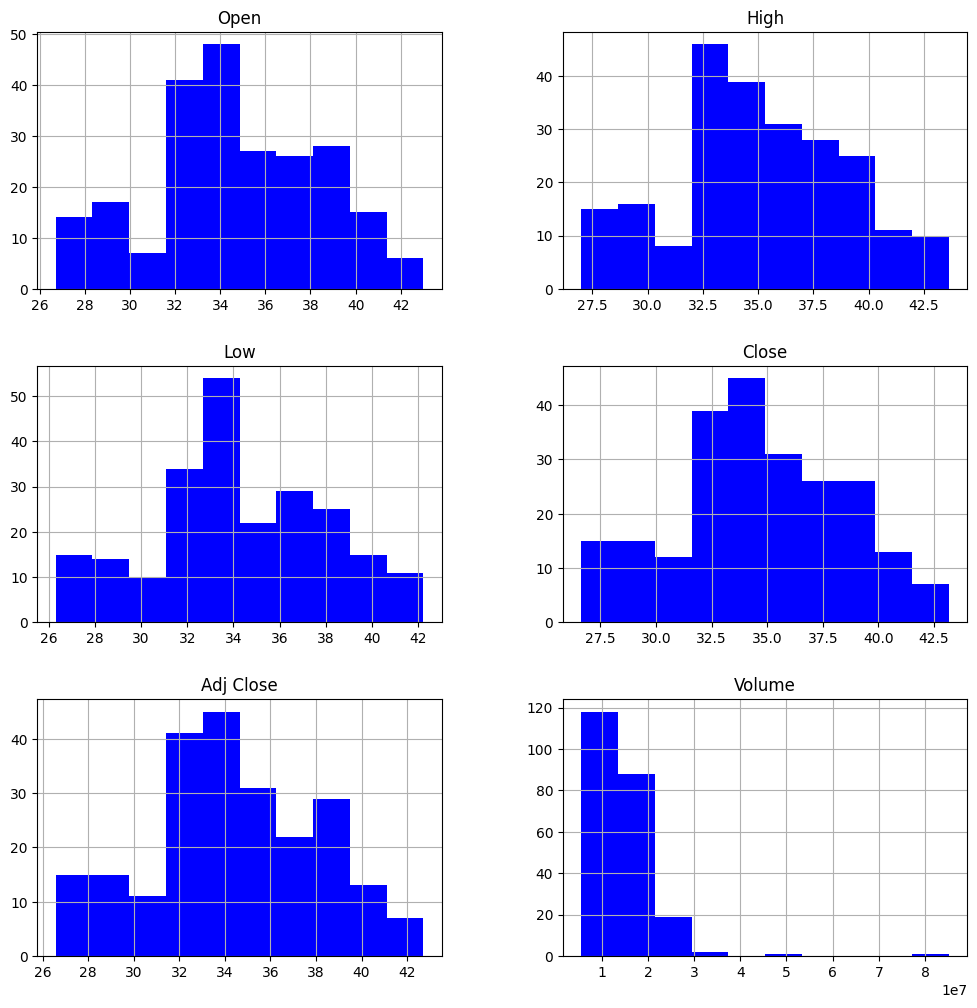

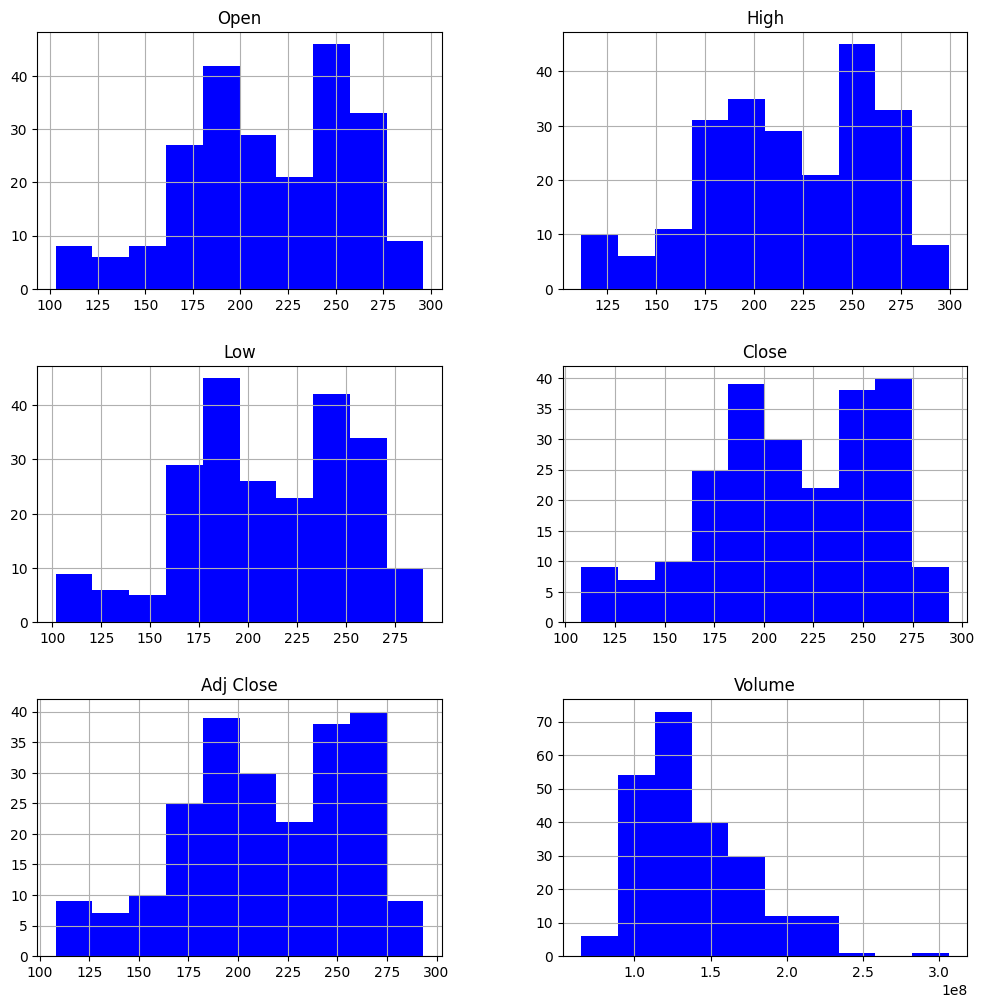

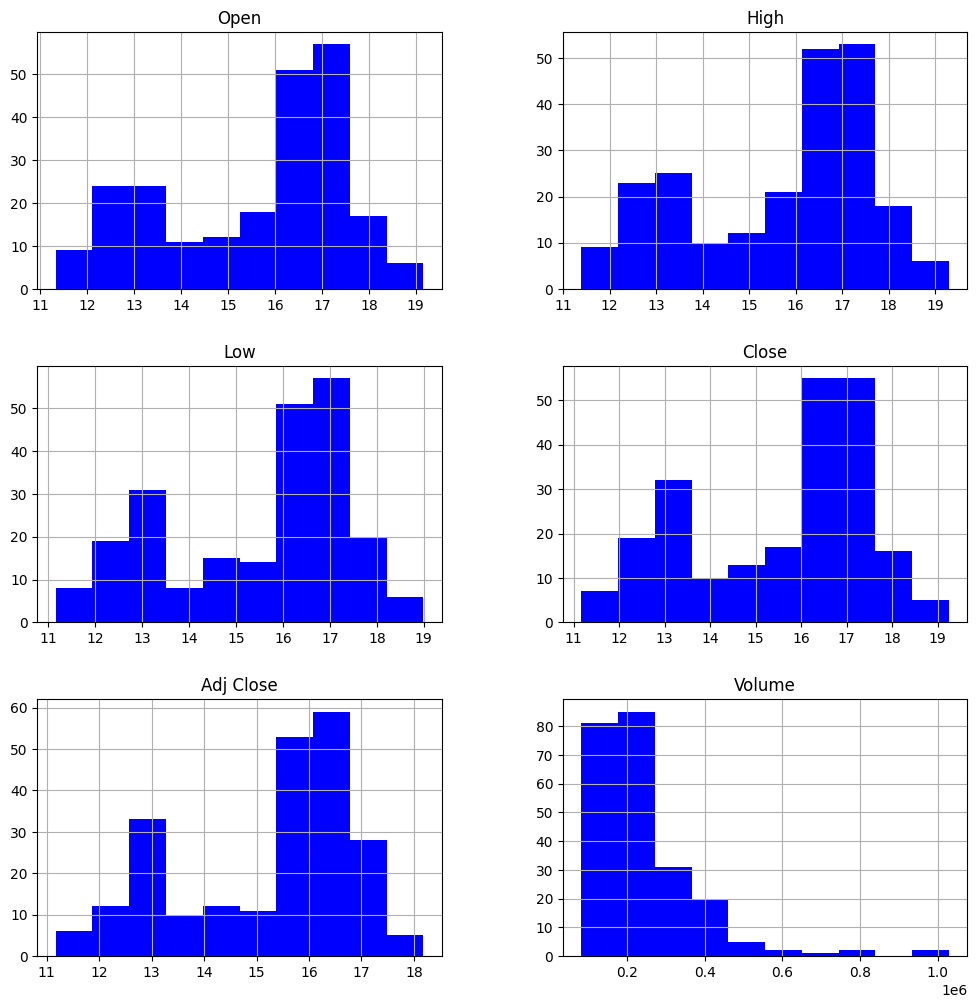

In [ ]:
#create histograms
tsla_df.groupby("Company").hist(figsize=(12, 12), color='blue')

In [ ]:
data = tsla_df[['Adj Close', 'Company']]
data

,Adj Close,Company
Date,,
2023-01-03,108.099998,TSLA
2023-01-04,113.639999,TSLA
2023-01-05,110.339996,TSLA
2023-01-06,113.059998,TSLA
2023-01-09,119.769997,TSLA
...,...,...
2023-11-22,0.720000,FORD
2023-11-24,0.750000,FORD
2023-11-27,0.750000,FORD


## Moving Average for all competitors

In [ ]:
stocks = ['TSLA','VWAGY','GM','FORD']
# Download adjusted closing prices data for the specified stocks within the given date range
data = yf.download(stocks, start=start_date, end=end_date)['Adj Close']

# Calculate moving averages for each stock
for stock in stocks:
    for days in [10, 20, 50]:
        # Calculate the moving average and create new columns in the DataFrame for each moving average
        data[f'{days} day MA - {stock}'] = data[stock].rolling(window=days).mean()

[*********************100%%**********************]  4 of 4 completed


In [ ]:
data

,FORD,GM,TSLA,VWAGY,10 day MA - TSLA,20 day MA - TSLA,50 day MA - TSLA,10 day MA - VWAGY,20 day MA - VWAGY,50 day MA - VWAGY,10 day MA - GM,20 day MA - GM,50 day MA - GM,10 day MA - FORD,20 day MA - FORD,50 day MA - FORD
Date,,,,,,,,,,,,,,,,
2023-01-03,1.03,33.461426,108.099998,15.431414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-04,1.03,34.322197,113.639999,15.856392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-05,1.08,34.628910,110.339996,15.800673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-06,1.11,35.529266,113.059998,16.116100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-09,1.12,35.539158,119.769997,16.196373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-22,0.72,28.019970,234.210007,12.710000,230.749001,221.3220,238.0148,12.786,12.33050,12.6860,27.598173,27.907789,29.957036,0.739,0.7215,0.7478
2023-11-24,0.75,28.099741,235.449997,12.950000,233.296001,222.8065,237.2030,12.859,12.41325,12.6798,27.750738,27.889342,29.847748,0.744,0.7230,0.7470
2023-11-27,0.75,28.418829,236.080002,12.890000,235.439001,224.2455,236.4368,12.922,12.49925,12.6728,27.915268,27.953160,29.739058,0.747,0.7260,0.7464


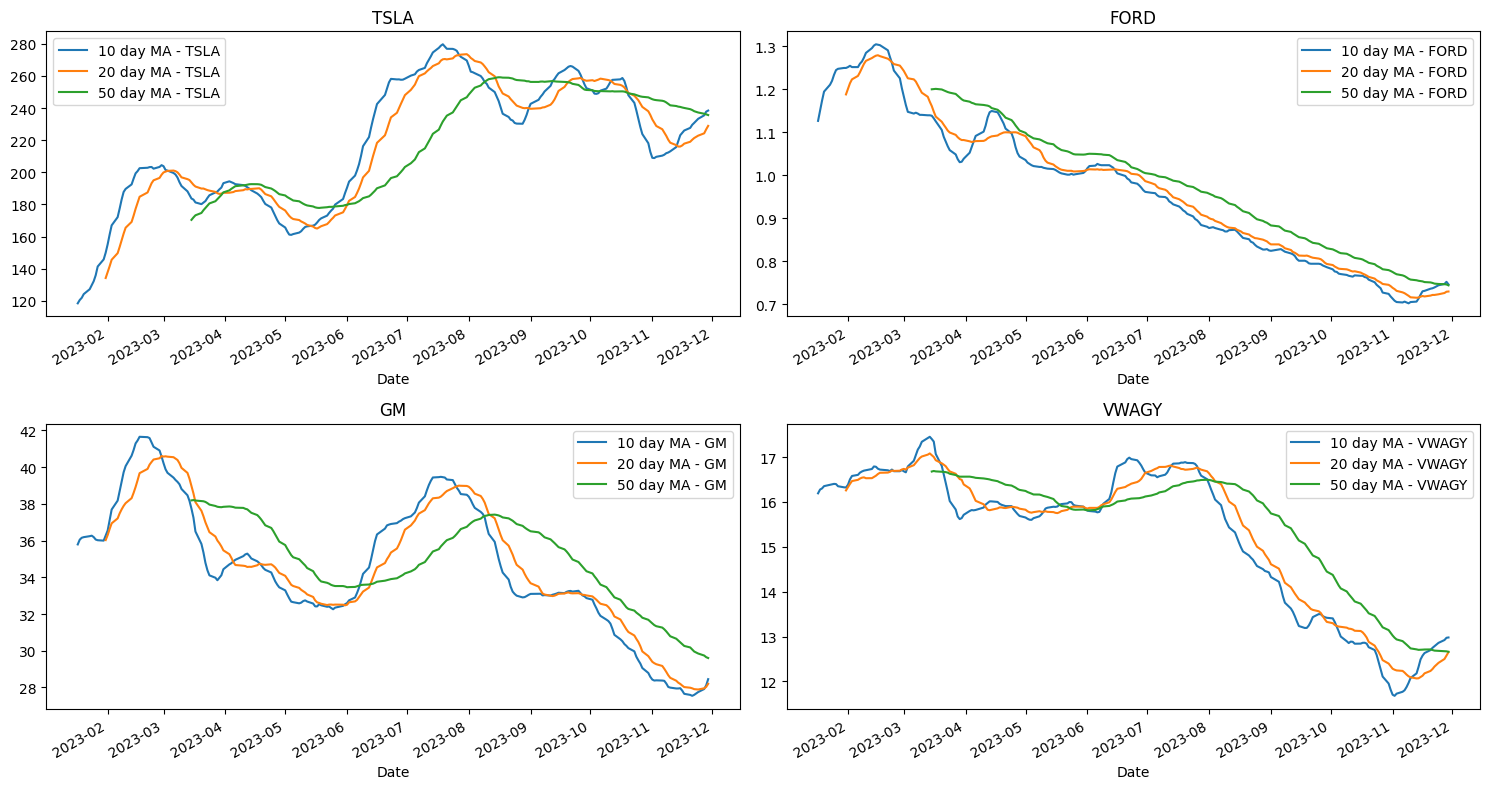

In [ ]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

TSLA = data[['10 day MA - TSLA','20 day MA - TSLA','50 day MA - TSLA']]
TSLA.plot(ax=axes[0,0])
axes[0,0].set_title('TSLA')

FORD = data[['10 day MA - FORD','20 day MA - FORD','50 day MA - FORD']]
FORD.plot(ax=axes[0,1])
axes[0,1].set_title('FORD')
fig.tight_layout()

GM = data[['10 day MA - GM','20 day MA - GM','50 day MA - GM']]
GM.plot(ax=axes[1,0])
axes[1,0].set_title('GM')
fig.tight_layout()

VWAGY = data[['10 day MA - VWAGY','20 day MA - VWAGY','50 day MA - VWAGY']]
VWAGY.plot(ax=axes[1,1])
axes[1,1].set_title('VWAGY')

fig.tight_layout()

## Calculate Percent change

In [ ]:
for stock in stocks:
        data[f'Daily Return - {stock}'] = data[stock].pct_change()

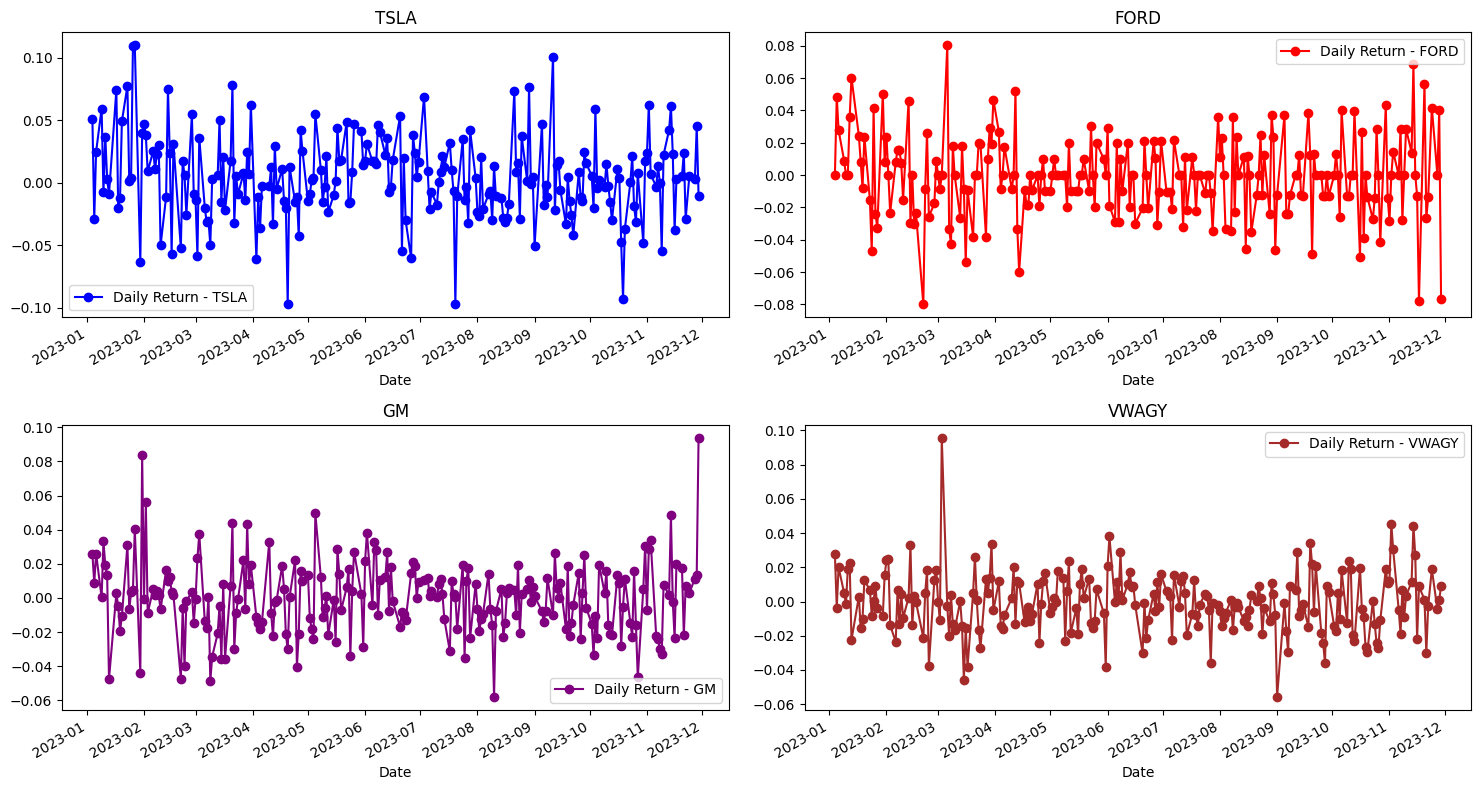

In [ ]:
# To plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

TSLA = data['Daily Return - TSLA'].plot(ax=axes[0,0], legend=True, linestyle='-', marker='o', color = 'blue')
axes[0,0].set_title('TSLA')

FORD = data['Daily Return - FORD'].plot(ax=axes[0,1], legend=True, linestyle='-', marker='o', color = 'red')
axes[0,1].set_title('FORD')

GM = data['Daily Return - GM'].plot(ax=axes[1,0], legend=True, linestyle='-', marker='o', color = 'purple')
axes[1,0].set_title('GM')

VWAGY = data['Daily Return - VWAGY'].plot(ax=axes[1,1], legend=True, linestyle='-', marker='o', color = 'brown')
axes[1,1].set_title('VWAGY')

fig.tight_layout()

## Calculating Daily Returns

[*********************100%%**********************]  1 of 1 completed


<ipython-input-138-0406280b94ee>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Daily Return'].dropna(), bins=100, color='blue')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-138-0406280b94ee>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Daily Return'].dropna(), bins=100, color='blue')
<ipython-input-138-0406280b94ee>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Daily Return'].dropna(), bins=100, color='blue')


[*********************100%%**********************]  1 of 1 completed


<ipython-input-138-0406280b94ee>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Daily Return'].dropna(), bins=100, color='blue')


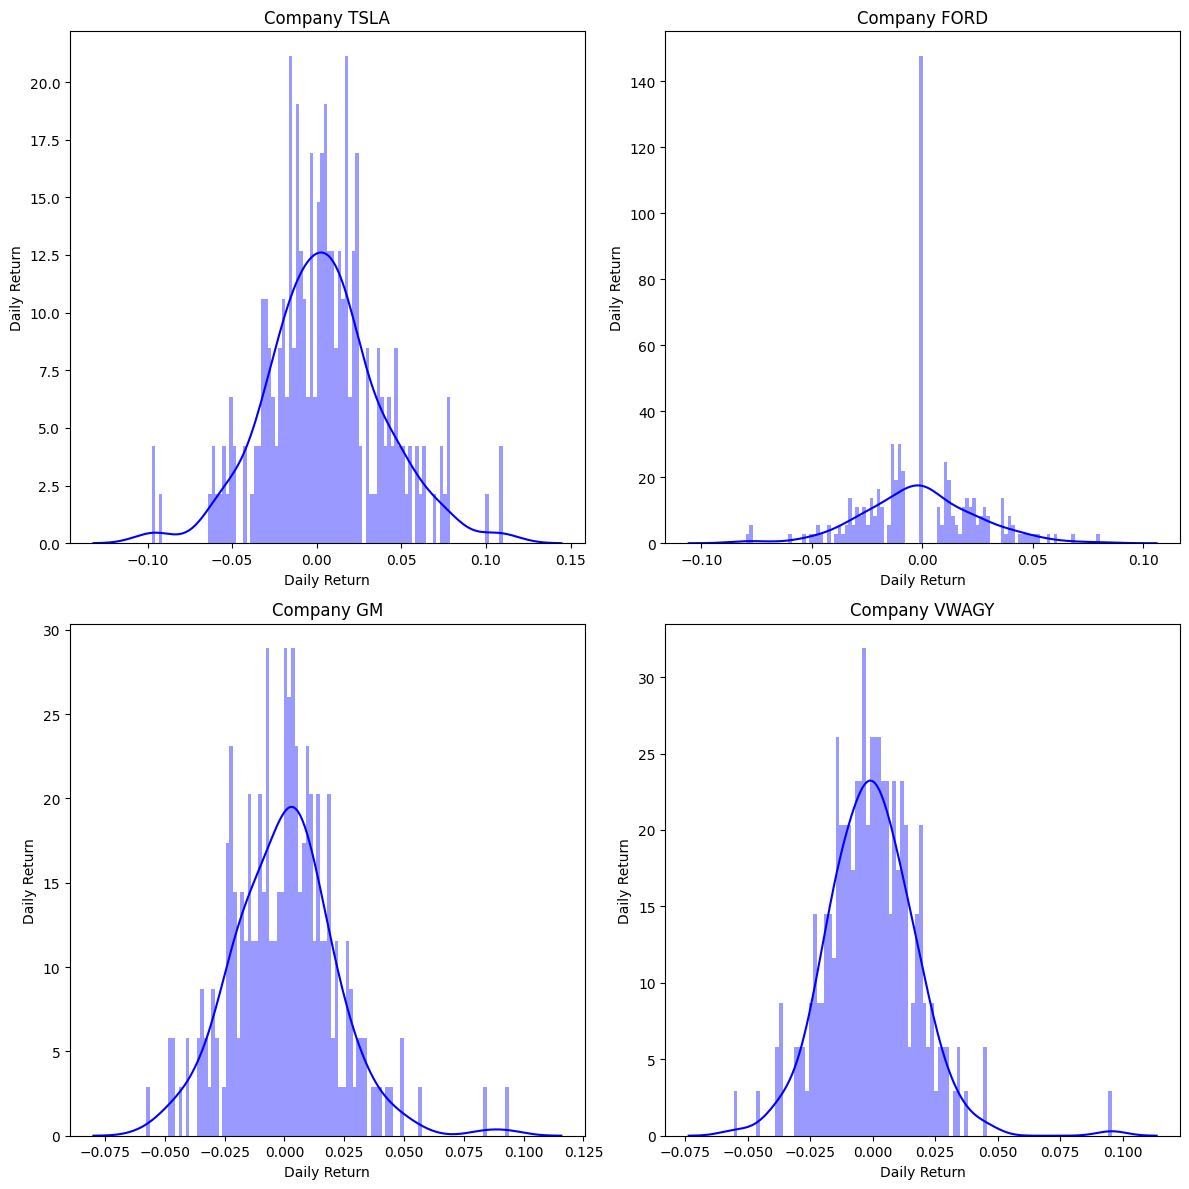

In [ ]:
# import yfinance as yf
# import matplotlib.pyplot as plt
# import seaborn as sns

# List of ticker symbols for companies
tech_list = ["TSLA", "FORD", "GM", "VWAGY"]
company_name = ['Company TSLA', 'Company FORD', 'Company GM', 'Company VWAGY']

plt.figure(figsize=(12, 12))

# Loop through each company ticker symbol in the list 'tech_list'
for i, ticker in enumerate(tech_list, 1):
    # Fetch stock data from Yahoo Finance for the current company within a specified date range
    data = yf.download(ticker, start='2023-01-01', end='2023-11-30')

    # Calculate daily returns
    data['Daily Return'] = data['Adj Close'].pct_change()

    plt.subplot(2, 2, i)
    sns.distplot(data['Daily Return'].dropna(), bins=100, color='blue')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()
plt.show()

## Calculating Risk vs Returns

In [ ]:
closing_df =  yf.download(comp, start=start_date, end=end_date)['Adj Close']
closing_df.index = pd.to_datetime(closing_df.index)
closing_df.index = closing_df.index.date
closing_df.index.name = 'Date'

[*********************100%%**********************]  4 of 4 completed


In [ ]:
# Making a new DataFrame for returns
tech_rets = closing_df.pct_change()
tech_rets.head()

,FORD,GM,TSLA,VWAGY
Date,,,,
2023-01-03,NaN,NaN,NaN,NaN
2023-01-04,0.000000,0.025724,0.051249,0.027540
2023-01-05,0.048544,0.008936,-0.029039,-0.003514
2023-01-06,0.027778,0.026000,0.024651,0.019963
2023-01-09,0.009009,0.000278,0.059349,0.004981


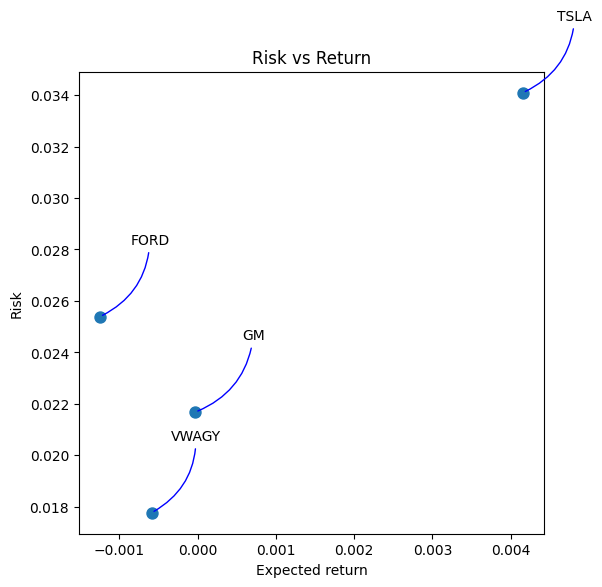

In [ ]:
# Making a new DataFrame for returns
rets = tech_rets.dropna()

area = np.pi*20

plt.figure(figsize=(6, 6))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.title('Risk vs Return')
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

## Correlation between returns of all the companies

<Axes: >

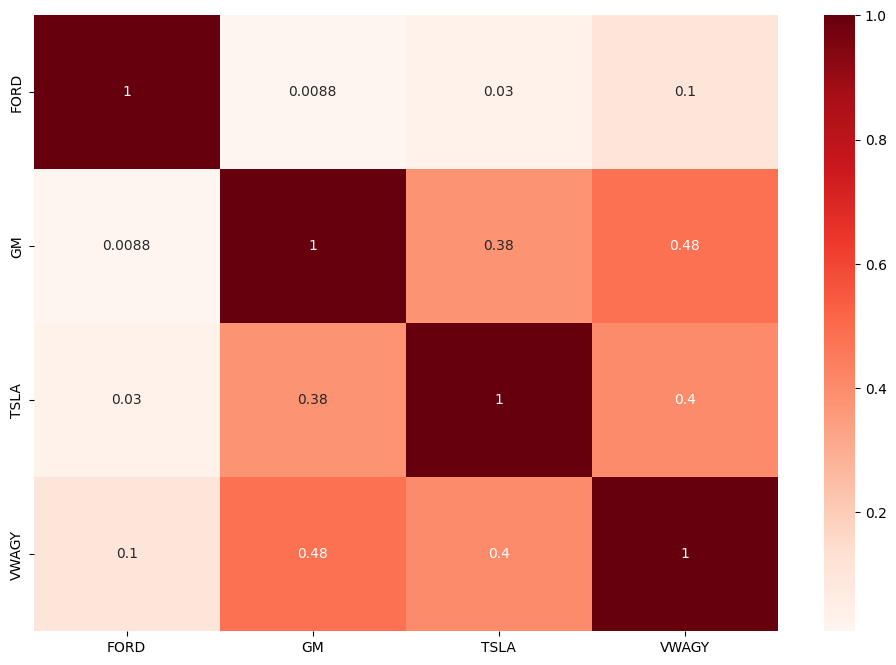

In [ ]:
sns.heatmap(tech_rets.corr(), annot=True, cmap='Reds')

# Data Extraction - Prepping the feature mart for TSLA

In [ ]:
!pip install fredapi

In [ ]:
import yfinance as yf
import pandas as pd
from datetime import datetime
from google.colab import files
from functools import reduce
from fredapi import Fred

In [ ]:
ticker_symbol = "TSLA"
stock_data = yf.download(ticker_symbol, interval="1d")

stock_data.reset_index(inplace=True)  # Reset the index to have the "Date" column


[*********************100%%**********************]  1 of 1 completed


In [ ]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [ ]:
stock_data["Returns"] = stock_data["Close"].pct_change()
stock_data["MovingAverage_50"] = stock_data["Close"].rolling(window=50).mean()
stock_data["MovingAverage_200"] = stock_data["Close"].rolling(window=200).mean()
stock_data["VolumeChange"] = stock_data["Volume"].pct_change()
stock_data["VolumeMovingAverage_50"] = stock_data["Volume"].rolling(window=50).mean()
stock_data["VolumeMovingAverage_200"] = stock_data["Volume"].rolling(window=200).mean()
risk_free_rate = 0.02
stock_data["MarketReturns"] = stock_data["Returns"].mean()
stock_data["CAPM"] = risk_free_rate + stock_data["MarketReturns"] * (stock_data["Returns"] - risk_free_rate)
stock_data["HighLowRange"] = stock_data["High"] - stock_data["Low"]
stock_data["HighCloseRange"] = stock_data["High"] - stock_data["Close"].shift()
stock_data["LowCloseRange"] = stock_data["Close"].shift() - stock_data["Low"]
stock_data["Volatility"] = stock_data[["HighLowRange", "HighCloseRange", "LowCloseRange"]].mean(axis=1)
window = 14
delta = stock_data["Close"].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
average_gain = gain.rolling(window=window).mean()
average_loss = loss.rolling(window=window).mean()
relative_strength = average_gain / average_loss
stock_data["RSI"] = 100 - (100 / (1 + relative_strength))

In [ ]:
# Momentum factors
window = 10
stock_data["Momentum"] = stock_data["Close"] - stock_data["Close"].shift(window)

# Volume-related features
stock_data["VolumeChange"] = stock_data["Volume"].pct_change()
stock_data["VolumeMovingAverage_10"] = stock_data["Volume"].rolling(window=10).mean()

# Price/return lags
lags = [1, 3, 5]  # Define the desired lag periods
for lag in lags:
    stock_data[f"PriceLag_{lag}"] = stock_data["Close"].shift(lag)
    stock_data[f"ReturnLag_{lag}"] = stock_data["Returns"].shift(lag)



In [ ]:
stock_data.to_csv('/content/tsla_stock_features.csv')

In [ ]:
stock_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Returns,MovingAverage_50,MovingAverage_200,VolumeChange,VolumeMovingAverage_50,VolumeMovingAverage_200,MarketReturns,CAPM,HighLowRange,HighCloseRange,LowCloseRange,Volatility,RSI,Momentum,VolumeMovingAverage_10,PriceLag_1,ReturnLag_1,PriceLag_3,ReturnLag_3,PriceLag_5,ReturnLag_5
3386,2023-12-11,242.740005,243.440002,237.449997,239.740005,239.740005,97913900,-0.016814,234.1668,225.1923,-0.049196,1.207817e+08,1.281275e+08,0.002135,0.019921,5.990005,-0.399994,6.389999,3.993337,54.259262,3.660004,121402130.0,243.839996,0.004946,239.369995,0.002723,235.580002,-0.013608
3387,2023-12-12,238.550003,238.990005,233.869995,237.009995,237.009995,95328300,-0.011387,233.8750,225.3392,-0.026407,1.202121e+08,1.277990e+08,0.002135,0.019933,5.120010,-0.750000,5.870010,3.413340,45.418758,-9.710007,116079970.0,239.740005,-0.016814,242.639999,0.013661,238.720001,0.013329
3388,2023-12-13,234.190002,240.300003,228.199997,239.289993,239.289993,146286300,0.009620,233.7302,225.5071,0.534553,1.210981e+08,1.277647e+08,0.002135,0.019978,12.100006,3.290009,8.809998,8.066671,56.192087,-4.850006,117168470.0,237.009995,-0.011387,243.839996,0.004946,239.369995,0.002723
3389,2023-12-14,241.220001,253.880005,240.789993,251.050003,251.050003,160569000,0.049145,233.5280,225.7485,0.097635,1.217150e+08,1.277833e+08,0.002135,0.020062,13.090012,14.590012,-1.500000,8.726674,65.133880,10.970001,119990050.0,239.289993,0.009620,239.740005,-0.016814,242.639999,0.013661
3390,2023-12-15,251.210007,253.679901,248.300003,252.380005,252.380005,77004153,0.005298,233.3746,226.0559,-0.520430,1.208719e+08,1.272608e+08,0.002135,0.019969,5.379898,2.629898,2.750000,3.586599,65.601073,13.550003,115573115.3,251.050003,0.049145,237.009995,-0.011387,243.839996,0.004946


In [ ]:
# fama_french_data

fama_french_data = pd.read_csv('/content/F-F_Research_Data_5_Factors_2x3_daily.CSV')
fama_french_data.head()
fama_french_data = fama_french_data.rename(columns={'date': 'Date'})
fama_french_data.head()
fama_french_data["Date"] = pd.to_datetime(fama_french_data["Date"], format="%Y%m%d")
# fama_french_data.drop("Date", axis=1, inplace=True)
fama_french_data.head()

,Date,Mkt-RF,SMB,HML,RMW,CMA,RF
0,1963-07-01,-0.67,0.02,-0.35,0.03,0.13,0.012
1,1963-07-02,0.79,-0.28,0.28,-0.08,-0.21,0.012
2,1963-07-03,0.63,-0.18,-0.10,0.13,-0.25,0.012
3,1963-07-05,0.40,0.09,-0.28,0.07,-0.30,0.012
4,1963-07-08,-0.63,0.07,-0.20,-0.27,0.06,0.012


In [ ]:
merged_data = pd.merge(stock_data, fama_french_data, on="Date", how="inner")
merged_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Returns,MovingAverage_50,MovingAverage_200,VolumeChange,VolumeMovingAverage_50,VolumeMovingAverage_200,MarketReturns,CAPM,HighLowRange,HighCloseRange,LowCloseRange,Volatility,RSI,Momentum,VolumeMovingAverage_10,PriceLag_1,ReturnLag_1,PriceLag_3,ReturnLag_3,PriceLag_5,ReturnLag_5,Mkt-RF,SMB,HML,RMW,CMA,RF
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN,NaN,NaN,NaN,NaN,NaN,0.002135,NaN,0.497334,NaN,NaN,0.497334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.23,-0.79,-1.29,0.45,-0.24,0.001
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,-0.002511,NaN,NaN,-0.084151,NaN,NaN,0.002135,0.019952,0.474667,0.435333,0.039334,0.316445,NaN,NaN,NaN,1.592667,NaN,NaN,NaN,NaN,NaN,-0.98,0.00,-0.34,-0.03,-0.02,0.001
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,-0.078473,NaN,NaN,-0.521804,NaN,NaN,0.002135,0.019790,0.376667,0.139333,0.237334,0.251111,NaN,NaN,NaN,1.588667,-0.002511,NaN,NaN,NaN,NaN,-0.40,-0.36,-0.43,0.49,0.13,0.001
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,-0.125683,NaN,NaN,-0.374629,NaN,NaN,0.002135,0.019689,0.292667,0.076000,0.216667,0.195111,NaN,NaN,NaN,1.464000,-0.078473,1.592667,NaN,NaN,NaN,-0.50,-0.33,-0.44,0.11,-0.37,0.001
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,-0.160937,NaN,NaN,0.336025,NaN,NaN,0.002135,0.019614,0.278000,0.053333,0.224667,0.185333,NaN,NaN,NaN,1.280000,-0.125683,1.588667,-0.002511,NaN,NaN,0.33,-1.96,0.11,0.04,-0.44,0.001


In [ ]:
# ADS_Index_Most_Current_Vintage
ADS_Index_Most_Current_Vintage = pd.read_excel('/content/ADS_Index_Most_Current_Vintage.xlsx')

ADS_Index_Most_Current_Vintage = ADS_Index_Most_Current_Vintage.rename(columns={'date': 'Date'})
ADS_Index_Most_Current_Vintage.head()

ADS_Index_Most_Current_Vintage["Date"] = pd.to_datetime(ADS_Index_Most_Current_Vintage["Date"], format="%Y:%m:%d")
ADS_Index_Most_Current_Vintage.head()

,Date,ADS_Index
0,1960-03-01,-0.572849
1,1960-03-02,-0.621380
2,1960-03-03,-0.666849
3,1960-03-04,-0.709275
4,1960-03-05,-0.748672


In [ ]:
merged_data2 = pd.merge(merged_data, ADS_Index_Most_Current_Vintage, on="Date", how="inner")
merged_data2.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Returns,MovingAverage_50,MovingAverage_200,VolumeChange,VolumeMovingAverage_50,VolumeMovingAverage_200,MarketReturns,CAPM,HighLowRange,HighCloseRange,LowCloseRange,Volatility,RSI,Momentum,VolumeMovingAverage_10,PriceLag_1,ReturnLag_1,PriceLag_3,ReturnLag_3,PriceLag_5,ReturnLag_5,Mkt-RF,SMB,HML,RMW,CMA,RF,ADS_Index
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN,NaN,NaN,NaN,NaN,NaN,0.002135,NaN,0.497334,NaN,NaN,0.497334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.23,-0.79,-1.29,0.45,-0.24,0.001,-0.033549
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,-0.002511,NaN,NaN,-0.084151,NaN,NaN,0.002135,0.019952,0.474667,0.435333,0.039334,0.316445,NaN,NaN,NaN,1.592667,NaN,NaN,NaN,NaN,NaN,-0.98,0.00,-0.34,-0.03,-0.02,0.001,-0.022329
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,-0.078473,NaN,NaN,-0.521804,NaN,NaN,0.002135,0.019790,0.376667,0.139333,0.237334,0.251111,NaN,NaN,NaN,1.588667,-0.002511,NaN,NaN,NaN,NaN,-0.40,-0.36,-0.43,0.49,0.13,0.001,-0.009707
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,-0.125683,NaN,NaN,-0.374629,NaN,NaN,0.002135,0.019689,0.292667,0.076000,0.216667,0.195111,NaN,NaN,NaN,1.464000,-0.078473,1.592667,NaN,NaN,NaN,-0.50,-0.33,-0.44,0.11,-0.37,0.001,0.001724
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,-0.160937,NaN,NaN,0.336025,NaN,NaN,0.002135,0.019614,0.278000,0.053333,0.224667,0.185333,NaN,NaN,NaN,1.280000,-0.125683,1.588667,-0.002511,NaN,NaN,0.33,-1.96,0.11,0.04,-0.44,0.001,0.034921


In [ ]:
# fill with your own FRED API
var_list = ['T10Y3M', 'OBMMIJUMBO30YF',  # term premium 10yr-3mon, 30 yr mortgage jumbo loan
           'DEXUSEU', 'DEXJPUS', 'DEXUSUK', # spot exchange rates to EUR, JPY, GBP
           'CBBTCUSD', 'CBETHUSD',  # cryptocurrencies
               'T10YIE', 'DCOILBRENTEU', # breakeven inflation + brent oil price
               'VIXCLS', # implied volatilities
               'DAAA', 'DBAA', # corporate bond yield
               'NIKKEI225', 'AMERIBOR', 'T10YIE', 'T5YIE', 'BAMLH0A0HYM2','BAMLH0A0HYM2EY',
                              'DGS10', 'DGS1', 'RIFSPPFAAD90NB', 'DCPN3M', 'DCPF1M', 'DCOILWTICO',
                              'DHHNGSP', 'USRECD', 'USRECDM', 'USRECDP', # JPN stock mkt index
            'UNRATE', # unemployment rate
            'SP500']

# api 307baa1e181fcc4713a148763423c76e
fred = Fred(api_key='307baa1e181fcc4713a148763423c76e')

data_dict = {}
for var in var_list:
    series = fred.get_series(var)
    series.name = var
    data_dict[var] = series

# Create a DataFrame from the fetched data
df_fred = pd.DataFrame(data_dict)

df_fred.tail()


,T10Y3M,OBMMIJUMBO30YF,DEXUSEU,DEXJPUS,DEXUSUK,CBBTCUSD,CBETHUSD,T10YIE,DCOILBRENTEU,VIXCLS,DAAA,DBAA,NIKKEI225,AMERIBOR,T5YIE,BAMLH0A0HYM2,BAMLH0A0HYM2EY,DGS10,DGS1,RIFSPPFAAD90NB,DCPN3M,DCPF1M,DCOILWTICO,DHHNGSP,USRECD,USRECDM,USRECDP,UNRATE,SP500
2023-12-11,-1.24,7.102,NaN,NaN,NaN,41205.53,2223.13,2.19,75.75,12.63,4.91,5.84,32791.80,5.44171,2.11,3.79,8.18,4.23,5.14,5.35,NaN,NaN,70.95,2.39,0.0,0.0,0.0,NaN,4622.44
2023-12-12,-1.26,7.333,NaN,NaN,NaN,41452.65,2201.29,2.16,NaN,12.07,4.88,5.80,32843.70,5.44427,2.08,3.76,8.13,4.20,5.14,NaN,NaN,NaN,NaN,2.37,0.0,0.0,0.0,NaN,4643.70
2023-12-13,-1.40,7.121,NaN,NaN,NaN,42927.11,2262.00,2.16,NaN,12.19,4.75,5.65,32926.35,5.42844,2.08,3.79,7.92,4.04,4.94,5.27,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,4707.09
2023-12-14,-1.51,6.924,NaN,NaN,NaN,43031.34,2315.38,2.22,NaN,12.48,4.60,5.49,32686.25,5.43108,2.18,3.47,7.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4719.55
2023-12-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32970.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# df_fred = df_fred.rename(columns={' ': 'Date'})
df_fred = df_fred.reset_index().rename(columns={'index': 'Date'})
df_fred.head()

,Date,T10Y3M,OBMMIJUMBO30YF,DEXUSEU,DEXJPUS,DEXUSUK,CBBTCUSD,CBETHUSD,T10YIE,DCOILBRENTEU,VIXCLS,DAAA,DBAA,NIKKEI225,AMERIBOR,T5YIE,BAMLH0A0HYM2,BAMLH0A0HYM2EY,DGS10,DGS1,RIFSPPFAAD90NB,DCPN3M,DCPF1M,DCOILWTICO,DHHNGSP,USRECD,USRECDM,USRECDP,UNRATE,SP500
0,1854-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN
1,1854-12-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN
2,1854-12-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN
3,1854-12-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN
4,1854-12-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN


In [ ]:
df_fred.to_csv('/content/fred.csv')


In [ ]:
# df_fred = pd.read_csv('/content/fred.csv')

# df_fred["Date"] = pd.to_datetime(df_fred["Date"], format="%d-%m-%Y")
# df_fred['Date'] = df_fred['Date'].dt.strftime('%Y-%m-%d')
df_fred['Date'] = pd.to_datetime(df_fred["Date"], format="%Y-%m-%d")

df_fred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61741 entries, 0 to 61740
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            61741 non-null  datetime64[ns]
 1   T10Y3M          10492 non-null  float64       
 2   OBMMIJUMBO30YF  1740 non-null   float64       
 3   DEXUSEU         6255 non-null   float64       
 4   DEXJPUS         13270 non-null  float64       
 5   DEXUSUK         13276 non-null  float64       
 6   CBBTCUSD        3266 non-null   float64       
 7   CBETHUSD        2764 non-null   float64       
 8   T10YIE          5244 non-null   float64       
 9   DCOILBRENTEU    9280 non-null   float64       
 10  VIXCLS          8565 non-null   float64       
 11  DAAA            10286 non-null  float64       
 12  DBAA            9527 non-null   float64       
 13  NIKKEI225       18531 non-null  float64       
 14  AMERIBOR        2524 non-null   float64       
 15  T5

In [ ]:
merged_data3 = pd.merge(merged_data2, df_fred, on="Date", how="inner")
merged_data3.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Returns,MovingAverage_50,MovingAverage_200,VolumeChange,VolumeMovingAverage_50,VolumeMovingAverage_200,MarketReturns,CAPM,HighLowRange,HighCloseRange,LowCloseRange,Volatility,RSI,Momentum,VolumeMovingAverage_10,PriceLag_1,ReturnLag_1,PriceLag_3,ReturnLag_3,PriceLag_5,ReturnLag_5,Mkt-RF,SMB,HML,RMW,CMA,RF,ADS_Index,T10Y3M,OBMMIJUMBO30YF,DEXUSEU,DEXJPUS,DEXUSUK,CBBTCUSD,CBETHUSD,T10YIE,DCOILBRENTEU,VIXCLS,DAAA,DBAA,NIKKEI225,AMERIBOR,T5YIE,BAMLH0A0HYM2,BAMLH0A0HYM2EY,DGS10,DGS1,RIFSPPFAAD90NB,DCPN3M,DCPF1M,DCOILWTICO,DHHNGSP,USRECD,USRECDM,USRECDP,UNRATE,SP500
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN,NaN,NaN,NaN,NaN,NaN,0.002135,NaN,0.497334,NaN,NaN,0.497334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.23,-0.79,-1.29,0.45,-0.24,0.001,-0.033549,2.82,NaN,1.2187,88.39,1.5081,NaN,NaN,1.83,74.21,34.13,4.71,6.09,9570.67,NaN,1.54,7.06,8.96,2.97,0.31,0.43,0.33,0.18,75.93,4.68,0.0,0.0,0.0,NaN,NaN
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,-0.002511,NaN,NaN,-0.084151,NaN,NaN,0.002135,0.019952,0.474667,0.435333,0.039334,0.316445,NaN,NaN,NaN,1.592667,NaN,NaN,NaN,NaN,NaN,-0.98,0.00,-0.34,-0.03,-0.02,0.001,-0.022329,2.79,NaN,1.2291,88.49,1.4947,NaN,NaN,1.82,74.94,34.54,4.66,6.05,9382.64,NaN,1.54,7.13,9.02,2.97,0.32,0.42,NaN,0.19,75.59,4.53,0.0,0.0,0.0,NaN,NaN
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,-0.078473,NaN,NaN,-0.521804,NaN,NaN,0.002135,0.019790,0.376667,0.139333,0.237334,0.251111,NaN,NaN,NaN,1.588667,-0.002511,NaN,NaN,NaN,NaN,-0.40,-0.36,-0.43,0.49,0.13,0.001,-0.009707,2.79,NaN,1.2464,87.42,1.5126,NaN,NaN,1.75,71.73,32.86,4.62,5.98,9191.60,NaN,1.48,7.17,9.05,2.96,0.32,0.40,NaN,0.24,72.95,4.54,0.0,0.0,0.0,9.4,NaN
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,-0.125683,NaN,NaN,-0.374629,NaN,NaN,0.002135,0.019689,0.292667,0.076000,0.216667,0.195111,NaN,NaN,NaN,1.464000,-0.078473,1.592667,NaN,NaN,NaN,-0.50,-0.33,-0.44,0.11,-0.37,0.001,0.001724,2.83,NaN,1.2577,87.69,1.5179,NaN,NaN,1.73,71.75,30.12,4.69,6.04,9203.71,NaN,1.48,7.13,9.04,3.00,0.31,0.37,0.28,0.25,72.06,4.72,0.0,0.0,0.0,NaN,NaN
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,-0.160937,NaN,NaN,0.336025,NaN,NaN,0.002135,0.019614,0.278000,0.053333,0.224667,0.185333,NaN,NaN,NaN,1.280000,-0.125683,1.588667,-0.002511,NaN,NaN,0.33,-1.96,0.11,0.04,-0.44,0.001,0.034921,2.78,NaN,1.2646,87.55,1.5180,NaN,NaN,1.69,73.08,29.65,4.64,6.00,9338.04,NaN,1.41,7.14,9.00,2.95,0.32,0.48,0.30,0.24,71.96,4.85,0.0,0.0,0.0,NaN,NaN


In [ ]:
# Define the stock tickers
tickers = ['VWAGY', 'GM', 'FORD']

# Fetch lifetime stock data from yfinance
Opp_stock_data = yf.download(tickers, start="1900-01-01")

# Extract the "Close" prices
close_prices = Opp_stock_data["Close"]



[*********************100%%**********************]  3 of 3 completed


In [ ]:
# Save the data to a CSV file
close_prices.to_csv("/content/Opp_stock_data.csv")

In [ ]:

merged_data4 = pd.merge(merged_data3, Opp_stock_data, on="Date", how="left")
merged_data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3359 entries, 0 to 3358
Data columns (total 82 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     3359 non-null   datetime64[ns]
 1   Open                     3359 non-null   float64       
 2   High                     3359 non-null   float64       
 3   Low                      3359 non-null   float64       
 4   Close                    3359 non-null   float64       
 5   Adj Close                3359 non-null   float64       
 6   Volume                   3359 non-null   int64         
 7   Returns                  3358 non-null   float64       
 8   MovingAverage_50         3310 non-null   float64       
 9   MovingAverage_200        3160 non-null   float64       
 10  VolumeChange             3358 non-null   float64       
 11  VolumeMovingAverage_50   3310 non-null   float64       
 12  VolumeMovingAverage_200  3160 non-

<ipython-input-164-f31cb3b9dd70>:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  merged_data4 = pd.merge(merged_data3, Opp_stock_data, on="Date", how="left")


In [ ]:
# merged

merged_data4.to_csv("TSLA_Feature_Mart.csv")
files.download("TSLA_Feature_Mart.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Feature Importance Analysis

In [ ]:
tesla = pd.read_csv('/content/tsla_stock_features.csv')

## Data Preprocessing

In [ ]:
tesla.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Returns,MovingAverage_50,MovingAverage_200,VolumeChange,VolumeMovingAverage_50,VolumeMovingAverage_200,MarketReturns,CAPM,HighLowRange,HighCloseRange,LowCloseRange,Volatility,RSI,Momentum,VolumeMovingAverage_10,PriceLag_1,ReturnLag_1,PriceLag_3,ReturnLag_3,PriceLag_5,ReturnLag_5
0,0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN,NaN,NaN,NaN,NaN,NaN,0.002135,NaN,0.497334,NaN,NaN,0.497334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,-0.002511,NaN,NaN,-0.084151,NaN,NaN,0.002135,0.019952,0.474667,0.435333,0.039334,0.316445,NaN,NaN,NaN,1.592667,NaN,NaN,NaN,NaN,NaN
2,2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,-0.078473,NaN,NaN,-0.521804,NaN,NaN,0.002135,0.019790,0.376667,0.139333,0.237334,0.251111,NaN,NaN,NaN,1.588667,-0.002511,NaN,NaN,NaN,NaN
3,3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,-0.125683,NaN,NaN,-0.374629,NaN,NaN,0.002135,0.019689,0.292667,0.076000,0.216667,0.195111,NaN,NaN,NaN,1.464000,-0.078473,1.592667,NaN,NaN,NaN
4,4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,-0.160937,NaN,NaN,0.336025,NaN,NaN,0.002135,0.019614,0.278000,0.053333,0.224667,0.185333,NaN,NaN,NaN,1.280000,-0.125683,1.588667,-0.002511,NaN,NaN


In [ ]:
tesla.describe()

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume,Returns,MovingAverage_50,MovingAverage_200,VolumeChange,VolumeMovingAverage_50,VolumeMovingAverage_200,MarketReturns,CAPM,HighLowRange,HighCloseRange,LowCloseRange,Volatility,RSI,Momentum,VolumeMovingAverage_10,PriceLag_1,ReturnLag_1,PriceLag_3,ReturnLag_3,PriceLag_5,ReturnLag_5
count,3391.000000,3391.000000,3391.000000,3391.000000,3391.000000,3391.000000,3.391000e+03,3390.000000,3342.000000,3192.000000,3390.000000,3.342000e+03,3.192000e+03,3391.000000,3390.000000,3391.000000,3390.000000,3390.000000,3391.000000,3378.000000,3381.000000,3.382000e+03,3390.000000,3389.000000,3388.000000,3387.000000,3386.000000,3385.000000
mean,1695.000000,70.001665,71.551907,68.335609,69.987647,69.987647,9.676850e+07,0.002135,69.288291,66.888452,0.099634,9.687674e+07,9.815063e+07,0.002135,0.019962,3.216298,1.638678,1.578422,2.144248,53.439161,0.711889,9.665520e+07,69.933844,0.002135,69.830399,0.002118,69.730845,0.002128
std,979.041708,101.242294,103.513592,98.749795,101.174009,101.174009,8.014895e+07,0.035875,99.775374,95.714832,0.624049,6.059014e+07,5.348427e+07,0.000000,0.000077,5.497807,4.103443,4.343955,3.665182,17.713562,15.187016,6.678078e+07,101.140404,0.035880,101.080453,0.035882,101.027222,0.035890
min,0.000000,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06,-0.210628,1.311467,1.581757,-0.796381,8.398560e+06,1.625358e+07,0.002135,0.019507,0.016667,-16.526672,-26.419983,0.011111,5.139218,-92.373322,3.663300e+06,1.053333,-0.210628,1.053333,-0.210628,1.053333,-0.210628
25%,847.500000,10.526667,10.873666,10.280000,10.688000,10.688000,4.588725e+07,-0.015570,10.955040,12.234020,-0.218685,5.925756e+07,6.804025e+07,0.002135,0.019924,0.270667,0.042000,0.024000,0.180445,40.647485,-0.825333,5.212864e+07,10.675334,-0.015578,10.650667,-0.015590,10.626667,-0.015578
50%,1695.000000,16.870667,17.177999,16.633333,16.904667,16.904667,8.109450e+07,0.001256,16.814873,17.060995,-0.028095,8.766430e+07,9.271804e+07,0.002135,0.019960,0.564667,0.230667,0.181334,0.376888,53.185802,0.088666,8.662959e+07,16.903666,0.001255,16.901333,0.001231,16.900000,0.001255
75%,2542.500000,102.067001,105.833332,98.601002,102.808334,102.808334,1.235296e+08,0.019299,92.563220,75.196229,0.252405,1.319453e+08,1.369172e+08,0.002135,0.019999,4.250002,0.920500,0.821667,2.833335,66.354892,1.412666,1.244980e+08,102.260000,0.019305,100.933498,0.019293,100.052666,0.019305
max,3390.000000,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08,0.243951,357.870532,304.789333,11.167515,3.285087e+08,2.539904e+08,0.002135,0.020478,54.326660,48.096649,50.473328,36.217773,97.529933,116.019989,4.685642e+08,409.970001,0.243951,409.970001,0.243951,409.970001,0.243951


In [ ]:
print(tesla.duplicated().value_counts())

In [ ]:
# finding null values
tesla.isnull().sum()

Unnamed: 0                   0
Date                         0
Open                         0
High                         0
Low                          0
Close                        0
Adj Close                    0
Volume                       0
Returns                      1
MovingAverage_50            49
MovingAverage_200          199
VolumeChange                 1
VolumeMovingAverage_50      49
VolumeMovingAverage_200    199
MarketReturns                0
CAPM                         1
HighLowRange                 0
HighCloseRange               1
LowCloseRange                1
Volatility                   0
RSI                         13
Momentum                    10
VolumeMovingAverage_10       9
PriceLag_1                   1
ReturnLag_1                  2
PriceLag_3                   3
ReturnLag_3                  4
PriceLag_5                   5
ReturnLag_5                  6
dtype: int64

In [ ]:
import pandas as pd

# Assuming your DataFrame is called 'data'

tesla.dropna(subset=['Returns'], inplace=True)
tesla.dropna(subset=['VolumeChange'], inplace=True)

tesla.dropna(subset=['VolumeMovingAverage_10'], inplace=True)
tesla.dropna(subset=['VolumeMovingAverage_50'], inplace=True)
tesla.dropna(subset=['VolumeMovingAverage_200'], inplace=True)
tesla.dropna(subset=['CAPM'], inplace=True)

tesla.dropna(subset=['PriceLag_1'], inplace=True)
tesla.dropna(subset=['ReturnLag_1'], inplace=True)
tesla.dropna(subset=['PriceLag_3'], inplace=True)
tesla.dropna(subset=['ReturnLag_3'], inplace=True)
tesla.dropna(subset=['PriceLag_5'], inplace=True)
tesla.dropna(subset=['ReturnLag_5'], inplace=True)

tesla.dropna(subset=['RSI'], inplace=True)
tesla.dropna(subset=['Momentum'], inplace=True)

In [ ]:
tesla

,Date,Open,High,Low,Close,Volume,Returns,MovingAverage_50,MovingAverage_200,VolumeChange,CAPM,HighCloseRange,LowCloseRange,Volatility,RSI,Momentum,VolumeMovingAverage_10
199,2011-04-12,1.672000,1.680667,1.620000,1.643333,20361000,-0.024535,1.597293,1.581757,-0.008763,0.019905,-0.004000,0.064667,0.040445,59.918659,0.048666,45251850.0
200,2011-04-13,1.675333,1.712667,1.654000,1.662000,18172500,0.011359,1.598653,1.582103,-0.107485,0.019982,0.069334,-0.010667,0.039111,60.433361,0.081333,45234150.0
201,2011-04-14,1.658000,1.685333,1.613333,1.676000,14751000,0.008424,1.600253,1.582540,-0.188279,0.019975,0.023333,0.048667,0.048000,59.755079,-0.174000,29432550.0
202,2011-04-15,1.710000,1.745333,1.694000,1.705333,14152500,0.017502,1.602853,1.583747,-0.040574,0.019995,0.069333,-0.018000,0.034222,59.556993,-0.072000,26550600.0
203,2011-04-18,1.675333,1.708000,1.624000,1.668667,15508500,-0.021501,1.604947,1.585690,0.095813,0.019911,0.002667,0.081333,0.056000,54.598182,-0.053333,24187500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3386,2023-12-11,242.740005,243.440002,237.449997,239.740005,97913900,-0.016814,234.166800,225.192300,-0.049196,0.019921,-0.399994,6.389999,3.993337,54.259262,3.660004,121402130.0
3387,2023-12-12,238.550003,238.990005,233.869995,237.009995,95328300,-0.011387,233.875000,225.339200,-0.026407,0.019933,-0.750000,5.870010,3.413340,45.418758,-9.710007,116079970.0
3388,2023-12-13,234.190002,240.300003,228.199997,239.289993,146286300,0.009620,233.730200,225.507100,0.534553,0.019978,3.290009,8.809998,8.066671,56.192087,-4.850006,117168470.0
3389,2023-12-14,241.220001,253.880005,240.789993,251.050003,160569000,0.049145,233.528000,225.748500,0.097635,0.020062,14.590012,-1.500000,8.726674,65.133880,10.970001,119990050.0


## Calculating p values

In [ ]:
# function to calculate p_values
from scipy.stats import pearsonr  # Import pearsonr from scipy.stats

def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    cols = df.columns
    p_values = pd.DataFrame(data=np.zeros(shape=(df.shape[1], df.shape[1])), columns=cols, index=cols)
    for r in df.columns:
        for c in df.columns:
            if r != c:
                p_values[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return p_values

correlation_matrix = tesla.corr()

# Calculate p-values
p_values = calculate_pvalues(tesla)

# Display the results
print("Correlation Matrix:\n", correlation_matrix)
print("\nP-Values:\n", p_values)
correlation_matrix

<ipython-input-237-2ea740a572be>:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = tesla.corr()


Correlation Matrix:
                             Open      High       Low     Close    Volume  \
Open                    1.000000  0.999721  0.999612  0.999197  0.068626   
High                    0.999721  1.000000  0.999621  0.999640  0.072340   
Low                     0.999612  0.999621  1.000000  0.999677  0.065195   
Close                   0.999197  0.999640  0.999677  1.000000  0.069594   
Volume                  0.068626  0.072340  0.065195  0.069594  1.000000   
Returns                -0.013914 -0.004902 -0.003708  0.006282  0.086459   
MovingAverage_50        0.981959  0.982162  0.981107  0.981276  0.049416   
MovingAverage_200       0.942700  0.942953  0.942431  0.942334  0.037566   
VolumeChange           -0.057789 -0.055717 -0.059719 -0.057278  0.255463   
CAPM                   -0.013914 -0.004902 -0.003708  0.006282  0.086459   
HighCloseRange          0.576098  0.588339  0.582059  0.592589  0.154686   
LowCloseRange           0.544572  0.539407  0.527862  0.525640  0.0

,Open,High,Low,Close,Volume,Returns,MovingAverage_50,MovingAverage_200,VolumeChange,CAPM,HighCloseRange,LowCloseRange,Volatility,RSI,Momentum,VolumeMovingAverage_10
Open,1.000000,0.999721,0.999612,0.999197,0.068626,-0.013914,0.981959,0.942700,-0.057789,-0.013914,0.576098,0.544572,0.865234,0.007321,0.087740,0.090611
High,0.999721,1.000000,0.999621,0.999640,0.072340,-0.004902,0.982162,0.942953,-0.055717,-0.004902,0.588339,0.539407,0.870314,0.008992,0.091107,0.092571
Low,0.999612,0.999621,1.000000,0.999677,0.065195,-0.003708,0.981107,0.942431,-0.059719,-0.003708,0.582059,0.527862,0.856422,0.011677,0.096232,0.089157
Close,0.999197,0.999640,0.999677,1.000000,0.069594,0.006282,0.981276,0.942334,-0.057278,0.006282,0.592589,0.525640,0.862558,0.012716,0.098539,0.091552
Volume,0.068626,0.072340,0.065195,0.069594,1.000000,0.086459,0.049416,0.037566,0.255463,0.086459,0.154686,0.093312,0.190258,0.102057,0.088991,0.786819
Returns,-0.013914,-0.004902,-0.003708,0.006282,0.086459,1.000000,-0.023274,-0.022009,0.063991,1.000000,0.442783,-0.450112,-0.025581,0.267674,0.221375,0.051945
MovingAverage_50,0.981959,0.982162,0.981107,0.981276,0.049416,-0.023274,1.000000,0.967760,-0.058407,-0.023274,0.560825,0.561208,0.866999,-0.076264,-0.035049,0.064185
MovingAverage_200,0.942700,0.942953,0.942431,0.942334,0.037566,-0.022009,0.967760,1.000000,-0.059026,-0.022009,0.538736,0.527489,0.823617,-0.073407,-0.026774,0.046987
VolumeChange,-0.057789,-0.055717,-0.059719,-0.057278,0.255463,0.063991,-0.058407,-0.059026,1.000000,0.063991,0.030382,0.000822,0.023451,0.014696,0.002434,-0.055373
CAPM,-0.013914,-0.004902,-0.003708,0.006282,0.086459,1.000000,-0.023274,-0.022009,0.063991,1.000000,0.442783,-0.450112,-0.025581,0.267674,0.221375,0.051945


In [ ]:
# Combine with previous list
columns_to_drop = ['Adj Close', 'Unnamed: 0', 'HighLowRange', 'VolumeMovingAverage_50', 'VolumeMovingAverage_200', 'MarketReturns', 'PriceLag_1', 'ReturnLag_1', 'PriceLag_3', 'ReturnLag_3', 'PriceLag_5', 'ReturnLag_5']

# Drop the columns
tesla = tesla.drop(columns_to_drop, axis=1)

# Optionally, save the modified DataFrame back to a CSV
# tesla.to_csv('TESLA_modified_file.csv', index=False)

In [ ]:
tesla.head(5)

,Date,Open,High,Low,Close,Volume,Returns,MovingAverage_50,MovingAverage_200,VolumeChange,CAPM,HighCloseRange,LowCloseRange,Volatility,RSI,Momentum,VolumeMovingAverage_10
199,2011-04-12,1.672000,1.680667,1.620000,1.643333,20361000,-0.024535,1.597293,1.581757,-0.008763,0.019905,-0.004000,0.064667,0.040445,59.918659,0.048666,45251850.0
200,2011-04-13,1.675333,1.712667,1.654000,1.662000,18172500,0.011359,1.598653,1.582103,-0.107485,0.019982,0.069334,-0.010667,0.039111,60.433361,0.081333,45234150.0
201,2011-04-14,1.658000,1.685333,1.613333,1.676000,14751000,0.008424,1.600253,1.582540,-0.188279,0.019975,0.023333,0.048667,0.048000,59.755079,-0.174000,29432550.0
202,2011-04-15,1.710000,1.745333,1.694000,1.705333,14152500,0.017502,1.602853,1.583747,-0.040574,0.019995,0.069333,-0.018000,0.034222,59.556993,-0.072000,26550600.0
203,2011-04-18,1.675333,1.708000,1.624000,1.668667,15508500,-0.021501,1.604947,1.585690,0.095813,0.019911,0.002667,0.081333,0.056000,54.598182,-0.053333,24187500.0


In [ ]:
tesla.describe()

,Open,High,Low,Close,Volume,Returns,MovingAverage_50,MovingAverage_200,VolumeChange,CAPM,HighCloseRange,LowCloseRange,Volatility,RSI,Momentum,VolumeMovingAverage_10
count,3192.000000,3192.000000,3192.000000,3192.000000,3.192000e+03,3192.000000,3192.000000,3192.000000,3192.000000,3192.000000,3192.000000,3192.000000,3192.000000,3192.000000,3192.000000,3.192000e+03
mean,74.266901,75.911349,72.499891,74.252319,1.013365e+08,0.002195,72.468307,66.888452,0.093280,0.019962,1.737569,1.673890,2.274306,53.575804,0.752595,1.012278e+08
std,102.854852,105.163372,100.319787,102.783843,7.997734e+07,0.035433,100.983704,95.714832,0.587192,0.000076,4.208959,4.459208,3.739360,17.823413,15.629279,6.587328e+07
min,1.462000,1.540667,1.433333,1.463333,3.594000e+06,-0.210628,1.597293,1.581757,-0.796381,0.019507,-16.526672,-26.419983,0.015555,5.139218,-92.373322,9.009450e+06
25%,12.945167,13.224000,12.692500,12.961834,5.224042e+07,-0.015328,13.225100,12.234020,-0.212352,0.019925,0.052000,0.029999,0.216000,40.826133,-0.961000,5.983800e+07
50%,17.598001,17.850000,17.337334,17.592000,8.468175e+07,0.001280,17.241793,17.060995,-0.025841,0.019960,0.261332,0.212000,0.406889,53.460069,0.121334,9.009304e+07
75%,137.014999,140.972500,135.012493,137.332497,1.274340e+08,0.019245,133.510686,75.196229,0.247925,0.019998,1.098000,0.963337,3.239995,66.679021,1.541500,1.279272e+08
max,411.470001,414.496674,405.666656,409.970001,9.140820e+08,0.243951,357.870532,304.789333,11.167515,0.020478,48.096649,50.473328,36.217773,97.529933,116.019989,4.685642e+08


In [ ]:
rows = len(tesla.index)
print(rows)


tesla = tesla.dropna()

3192


In [ ]:
print(tesla.head())
tesla.isnull().sum()

           Date      Open      High       Low     Close    Volume   Returns  \
199  2011-04-12  1.672000  1.680667  1.620000  1.643333  20361000 -0.024535   
200  2011-04-13  1.675333  1.712667  1.654000  1.662000  18172500  0.011359   
201  2011-04-14  1.658000  1.685333  1.613333  1.676000  14751000  0.008424   
202  2011-04-15  1.710000  1.745333  1.694000  1.705333  14152500  0.017502   
203  2011-04-18  1.675333  1.708000  1.624000  1.668667  15508500 -0.021501   

     MovingAverage_50  MovingAverage_200  VolumeChange      CAPM  \
199          1.597293           1.581757     -0.008763  0.019905   
200          1.598653           1.582103     -0.107485  0.019982   
201          1.600253           1.582540     -0.188279  0.019975   
202          1.602853           1.583747     -0.040574  0.019995   
203          1.604947           1.585690      0.095813  0.019911   

     HighCloseRange  LowCloseRange  Volatility        RSI  Momentum  \
199       -0.004000       0.064667    0.04044

Date                      0
Open                      0
High                      0
Low                       0
Close                     0
Volume                    0
Returns                   0
MovingAverage_50          0
MovingAverage_200         0
VolumeChange              0
CAPM                      0
HighCloseRange            0
LowCloseRange             0
Volatility                0
RSI                       0
Momentum                  0
VolumeMovingAverage_10    0
dtype: int64

In [ ]:
tesla


,Date,Open,High,Low,Close,Volume,Returns,MovingAverage_50,MovingAverage_200,VolumeChange,CAPM,HighCloseRange,LowCloseRange,Volatility,RSI,Momentum,VolumeMovingAverage_10
199,2011-04-12,1.672000,1.680667,1.620000,1.643333,20361000,-0.024535,1.597293,1.581757,-0.008763,0.019905,-0.004000,0.064667,0.040445,59.918659,0.048666,45251850.0
200,2011-04-13,1.675333,1.712667,1.654000,1.662000,18172500,0.011359,1.598653,1.582103,-0.107485,0.019982,0.069334,-0.010667,0.039111,60.433361,0.081333,45234150.0
201,2011-04-14,1.658000,1.685333,1.613333,1.676000,14751000,0.008424,1.600253,1.582540,-0.188279,0.019975,0.023333,0.048667,0.048000,59.755079,-0.174000,29432550.0
202,2011-04-15,1.710000,1.745333,1.694000,1.705333,14152500,0.017502,1.602853,1.583747,-0.040574,0.019995,0.069333,-0.018000,0.034222,59.556993,-0.072000,26550600.0
203,2011-04-18,1.675333,1.708000,1.624000,1.668667,15508500,-0.021501,1.604947,1.585690,0.095813,0.019911,0.002667,0.081333,0.056000,54.598182,-0.053333,24187500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3386,2023-12-11,242.740005,243.440002,237.449997,239.740005,97913900,-0.016814,234.166800,225.192300,-0.049196,0.019921,-0.399994,6.389999,3.993337,54.259262,3.660004,121402130.0
3387,2023-12-12,238.550003,238.990005,233.869995,237.009995,95328300,-0.011387,233.875000,225.339200,-0.026407,0.019933,-0.750000,5.870010,3.413340,45.418758,-9.710007,116079970.0
3388,2023-12-13,234.190002,240.300003,228.199997,239.289993,146286300,0.009620,233.730200,225.507100,0.534553,0.019978,3.290009,8.809998,8.066671,56.192087,-4.850006,117168470.0
3389,2023-12-14,241.220001,253.880005,240.789993,251.050003,160569000,0.049145,233.528000,225.748500,0.097635,0.020062,14.590012,-1.500000,8.726674,65.133880,10.970001,119990050.0


In [ ]:
# df to csv file

tesla.to_csv("TSLA_Feature_Mart_IMP.csv")
files.download("TSLA_Feature_Mart_IMP.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Correlation Matrix for the selected features

<ipython-input-241-036876daa2c5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = tesla.corr()


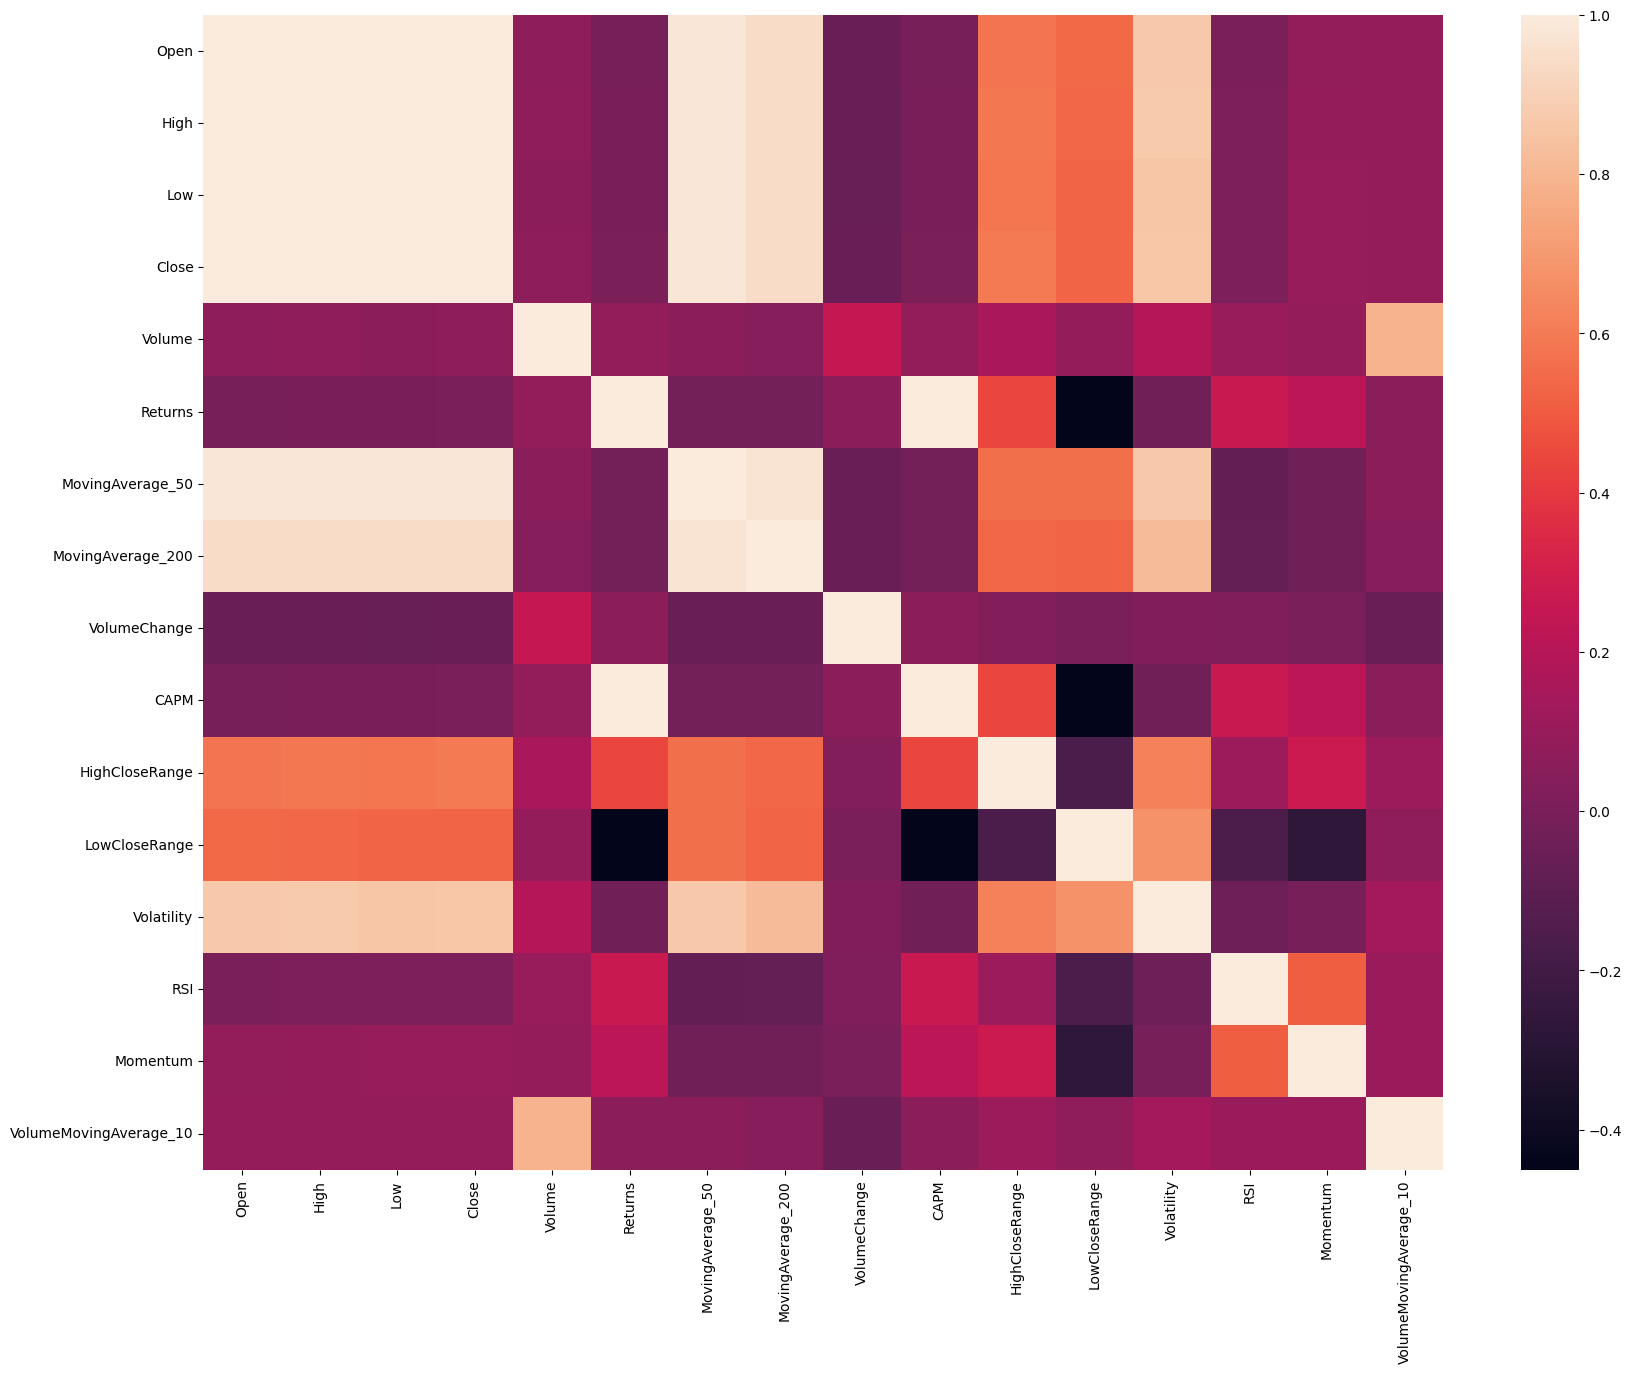

In [241]:
plt.figure(figsize=(20,15))
cor = tesla.corr()
sns.heatmap(cor)
plt.show()

### Distribution for each feature

<ipython-input-242-ffc6be17933e>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


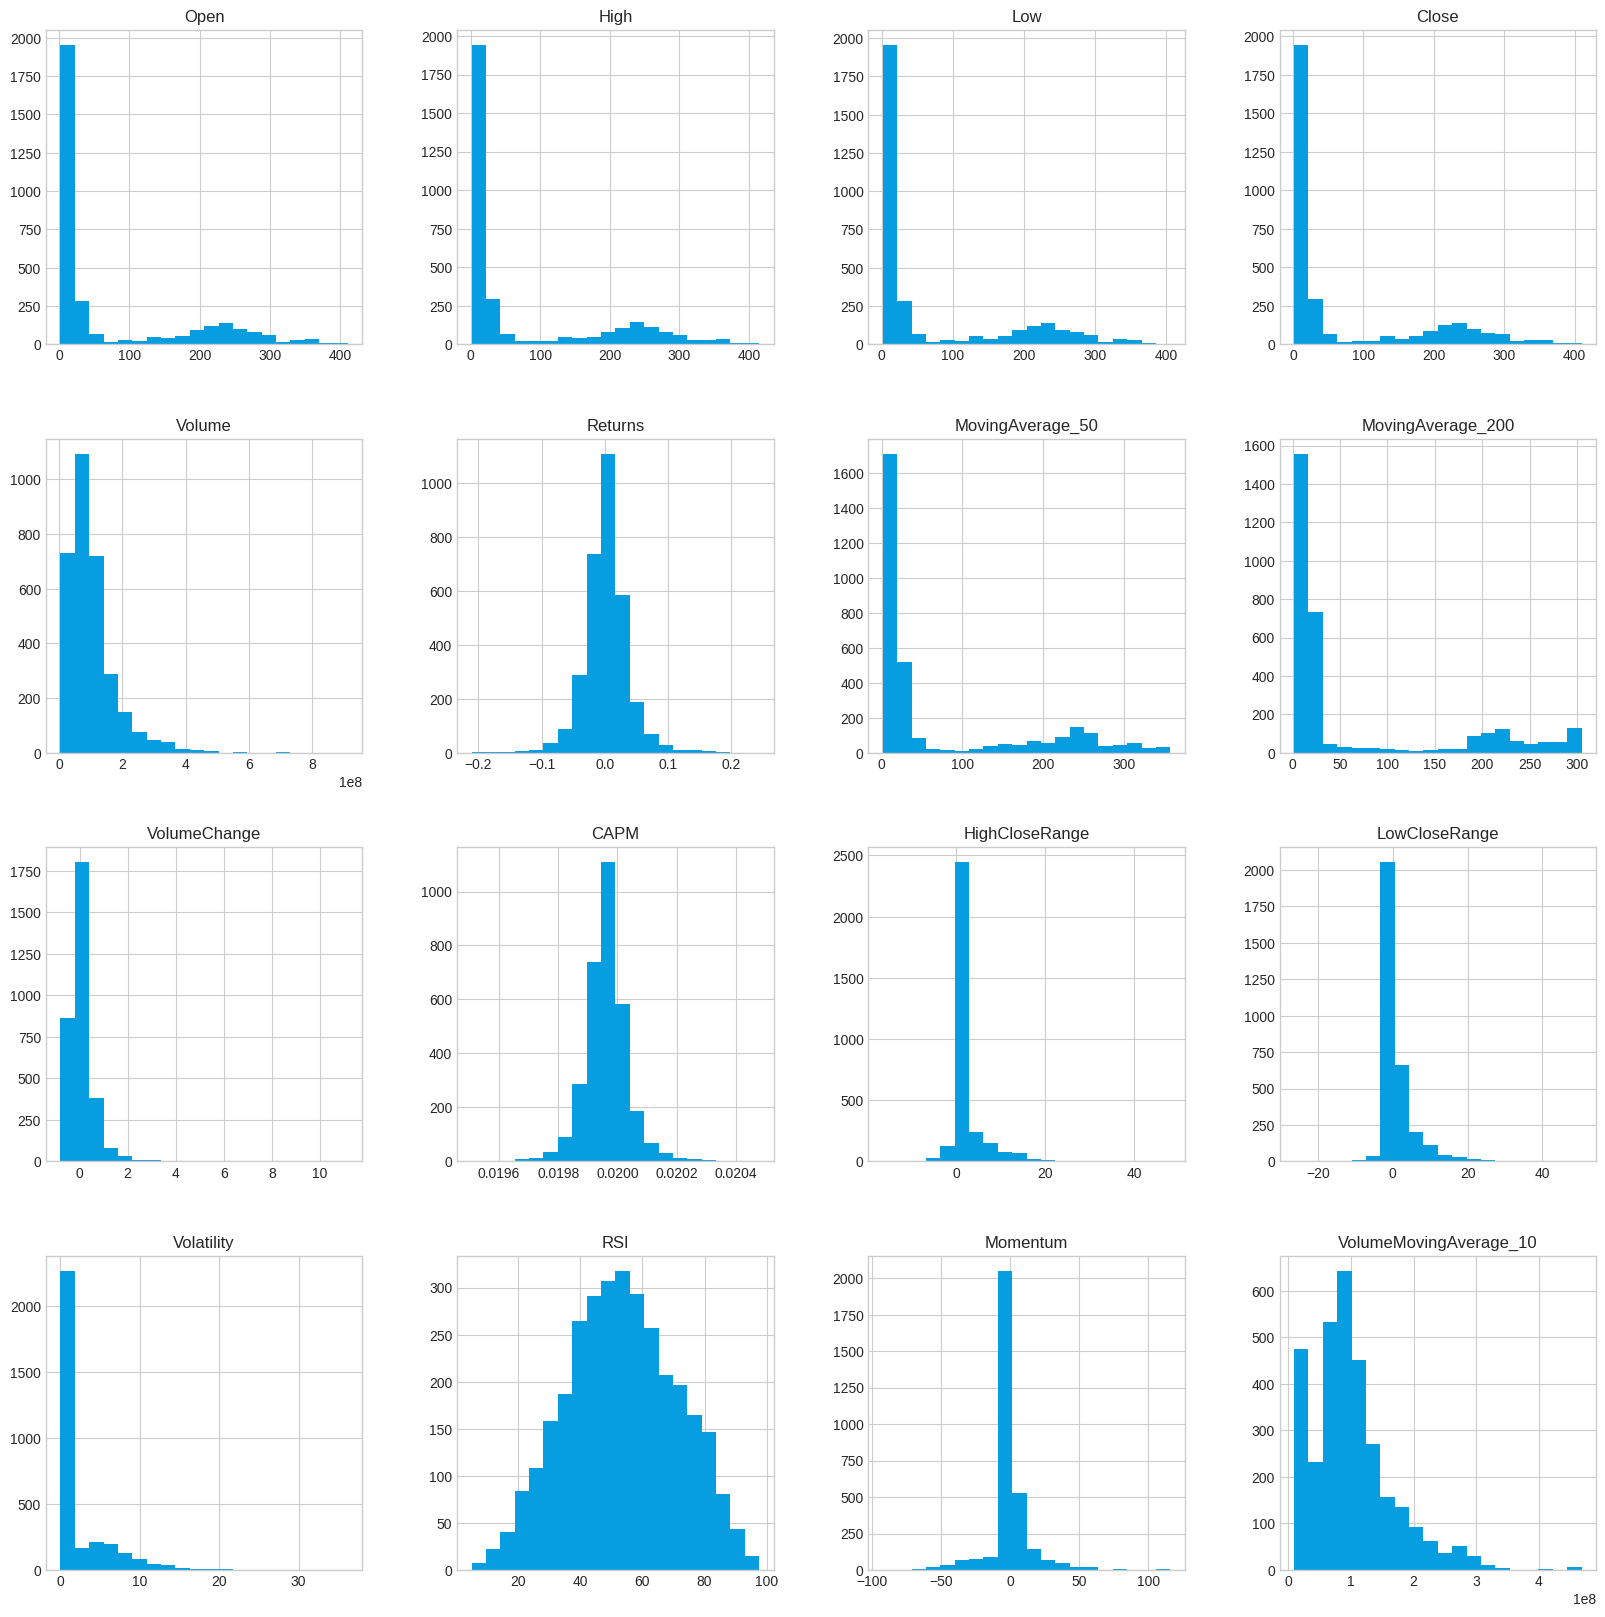

In [242]:
plt.style.use('seaborn-whitegrid')

tesla.hist(bins=20, figsize=(20,20), color='#069EE1')
plt.show();

# Model training

In [ ]:
!pip install pandas yfinance ta seaborn matplotlib pandas-datareader jinja2 fredapi openpyxl xgboost scikit-learn statsmodels mlflow


In [ ]:
import pandas as pd
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import math
import xgboost as xgb
from sklearn.linear_model import Lasso
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.pyll import scope

# pd.set_option("display.max_columns", None)
# plt.rcParams["figure.figsize"] = (15, 20)

## Latest TESLA Prices

In [ ]:
start_date = datetime(2023, 7, 1)
end_date = datetime(2023, 12, 31)

TSLA_STOCK = yf.download("TSLA", start_date, end_date)
TSLA_STOCK.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-03,276.489990,284.250000,275.109985,279.820007,279.820007,119685900
2023-07-05,278.820007,283.850006,277.600006,282.480011,282.480011,131530900
2023-07-06,278.089996,279.970001,272.880005,276.540009,276.540009,120332100
2023-07-07,278.429993,280.779999,273.769989,274.429993,274.429993,113602000
2023-07-10,276.470001,277.519989,265.100006,269.609985,269.609985,119425400


## Train & Test Data Split

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [ ]:
tsla = pd.read_csv("/content/TSLA_Feature_Mart_IMP.csv")
tsla.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Returns,MovingAverage_50,MovingAverage_200,VolumeChange,CAPM,HighCloseRange,LowCloseRange,Volatility,RSI,Momentum,VolumeMovingAverage_10
0,199,2011-04-12,1.672000,1.680667,1.620000,1.643333,20361000,-0.024535,1.597293,1.581757,-0.008763,0.019905,-0.004000,0.064667,0.040445,59.918659,0.048666,45251850.0
1,200,2011-04-13,1.675333,1.712667,1.654000,1.662000,18172500,0.011359,1.598653,1.582103,-0.107485,0.019982,0.069334,-0.010667,0.039111,60.433361,0.081333,45234150.0
2,201,2011-04-14,1.658000,1.685333,1.613333,1.676000,14751000,0.008424,1.600253,1.582540,-0.188279,0.019975,0.023333,0.048667,0.048000,59.755079,-0.174000,29432550.0
3,202,2011-04-15,1.710000,1.745333,1.694000,1.705333,14152500,0.017502,1.602853,1.583747,-0.040574,0.019995,0.069333,-0.018000,0.034222,59.556993,-0.072000,26550600.0
4,203,2011-04-18,1.675333,1.708000,1.624000,1.668667,15508500,-0.021501,1.604947,1.585690,0.095813,0.019911,0.002667,0.081333,0.056000,54.598182,-0.053333,24187500.0


In [ ]:
# Split the data into features (X) and target variable (y)
input = tsla.drop(['Close'], axis=1)

output = tsla['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(input, output, test_size=0.4, random_state=42)
X = X_train
y = y_train

In [ ]:
def merge_results(y_test, y_pred, TSLA_STOCK):
    y_test = y_test.to_frame(name="Actual")
    y_test = y_test.rename_axis("Date")

    y_pred = pd.Series(y_pred, index=y_test.index)
    y_pred = y_pred.to_frame(name="Predicted")
    y_pred = y_pred.rename_axis("Date")

    results = TSLA_STOCK.merge(y_test, left_index=True, right_index=True, how="inner")
    results = results.merge(y_pred, left_index=True, right_index=True, how="inner")
    results = results[["Actual", "Predicted", "Open", "Close"]]

    return results

## Random Forest Regressors

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
import math
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Load your data
# data = pd.read_csv('your_file.csv')  # Uncomment this if you're reading from a file
data = pd.read_csv("/content/TSLA_Feature_Mart_IMP.csv")
# Preprocessing as before
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data.drop('Date', axis=1, inplace=True)

X = data.drop('Close', axis=1)
y = data['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the grid search object
# Use RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_grid,
    n_iter=10,  # Number of parameter settings sampled
    cv=3,  # Reduced number of cross-validation folds
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the grid search to the data
random_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", random_search.best_params_)

# Best model
best_model = random_search.best_estimator_

# Predict and evaluate using the best model
y_pred = best_model.predict(X_test)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))

print(f"Optimized Random Forest Regressor RMSE: {rmse}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters found:  {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10}
Optimized Random Forest Regressor RMSE: 2.1152895548092325


### Plot Actual and Predicted

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

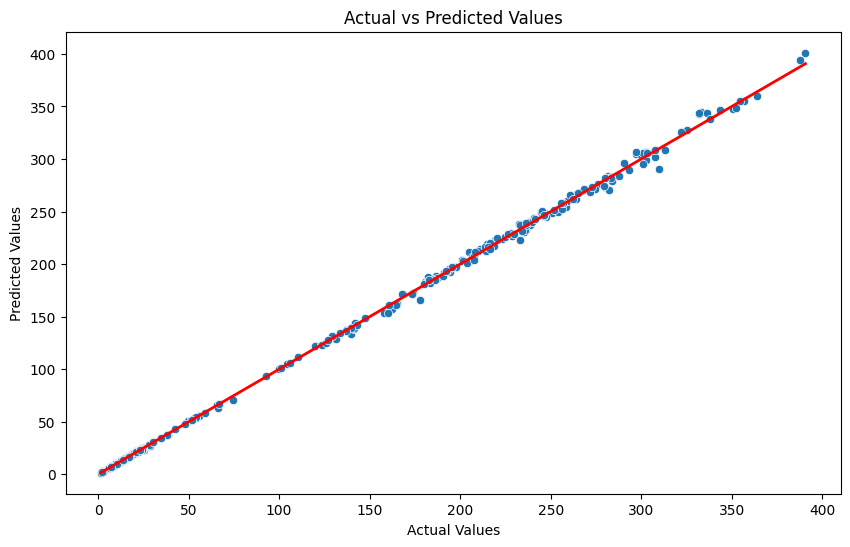

In [ ]:
# Actual vs Predicted scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.show()

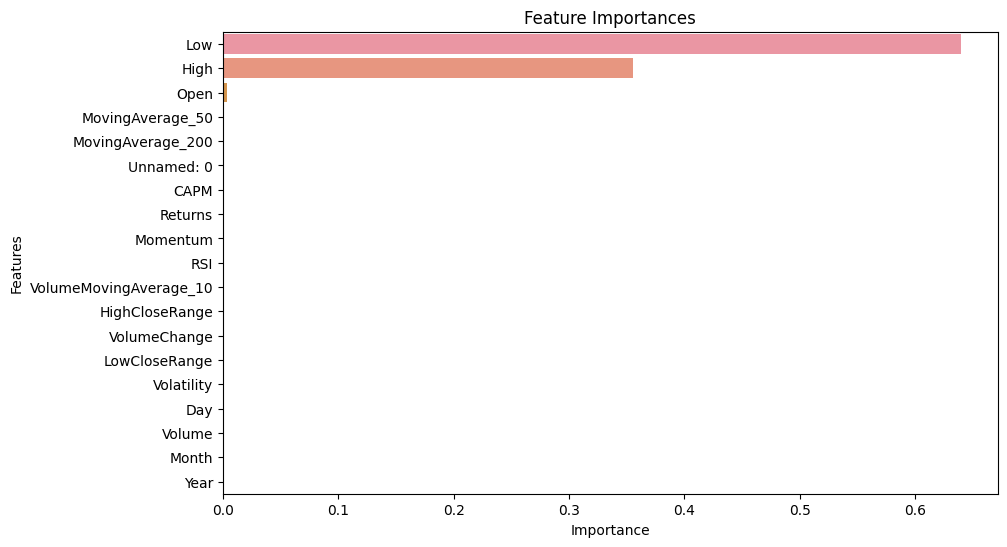

In [ ]:
# Feature importance plot
feature_importances = best_model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Features': features, 'Importance': feature_importances})

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Features', data=importance_df.sort_values(by='Importance', ascending=False))
plt.title('Feature Importances')
plt.show()

### Trading Signals


In [ ]:
# Convert y_test to DataFrame
y_test_df = pd.DataFrame(y_test)
y_test_df.columns = ['Actual']

# Convert y_pred to DataFrame
y_pred_df = pd.DataFrame(y_pred, index=y_test_df.index)
y_pred_df.columns = ['Predicted']

# Assuming 'data' is your original DataFrame and it includes 'Open' and 'Close' columns
# You may need to adjust this if your DataFrame has a different structure or names
data_subset = data[['Open', 'Close']]

# Reset index of your data subset to merge correctly
data_subset = data_subset.reset_index()

# Merge with y_test_df and y_pred_df
results = data_subset.merge(y_test_df, left_index=True, right_index=True)
results = results.merge(y_pred_df, left_index=True, right_index=True)

# Display the first few rows of the results
results.tail(20)

,index,Open,Close,Actual,Predicted
3083,3083,277.010010,281.380005,281.380005,281.705163
3085,3085,290.149994,293.339996,293.339996,289.692172
3087,3087,279.559998,262.899994,262.899994,265.338483
3090,3090,272.380005,265.279999,265.279999,267.888573
3107,3107,226.059998,219.220001,219.220001,222.719344
3110,3110,240.250000,233.190002,233.190002,237.477584
3119,3119,245.000000,256.489990,256.489990,252.791987
3131,3131,257.850006,255.699997,255.699997,258.445491
3132,3132,257.399994,244.880005,244.880005,250.013616
3136,3136,240.020004,246.380005,246.380005,245.417160


## Ridge Regression

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a range of alpha values for the grid search
param_grid = {'alpha': np.logspace(-4, 4, 20)}

# Create the Grid Search object
grid_search = GridSearchCV(estimator=Ridge(), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Find the best parameters
best_alpha = grid_search.best_params_['alpha']
print("Best alpha found: ", best_alpha)

# Create and train the Ridge model with the best alpha
best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(X_train, y_train)

# Predict
y_pred_best_ridge = best_ridge_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.71101e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.58258e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.62656e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.64679e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin

Best alpha found:  0.08858667904100823


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.59491e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.59491e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [ ]:
rmse_best_ridge = np.sqrt(mean_squared_error(y_test, y_pred_best_ridge))
print(f'Tuned Ridge Regression RMSE: {rmse_best_ridge}')


Tuned Ridge Regression RMSE: 1.7144318378140322


### Plot Actual and Predicted

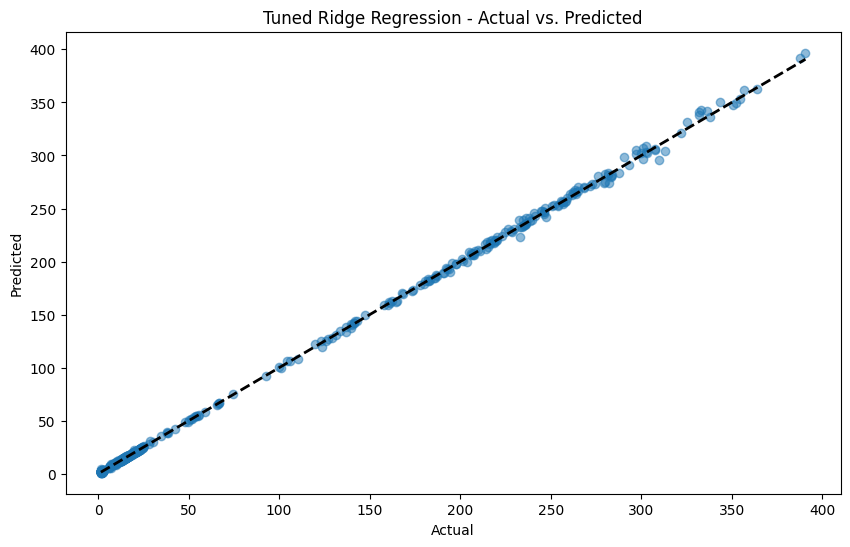

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_ridge, alpha=0.5)
plt.title('Tuned Ridge Regression - Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

## LASSO

In [ ]:
from sklearn.linear_model import Lasso

# Define a range of alpha values for the grid search
param_grid_lasso = {'alpha': np.logspace(-4, 4, 20)}

# Create the Grid Search object
grid_search_lasso = GridSearchCV(estimator=Lasso(), param_grid=param_grid_lasso, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search_lasso.fit(X_train, y_train)

# Find the best parameters
best_alpha_lasso = grid_search_lasso.best_params_['alpha']
print("Best alpha for LASSO: ", best_alpha_lasso)

# Create and train the LASSO model with the best alpha
best_lasso_model = Lasso(alpha=best_alpha_lasso)
best_lasso_model.fit(X_train, y_train)

# Predict
y_pred_best_lasso = best_lasso_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.048e+03, tolerance: 2.161e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.129e+03, tolerance: 2.208e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.626e+03, tolerance: 2.114e

Best alpha for LASSO:  0.0018329807108324356


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.046e+03, tolerance: 2.704e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.046e+03, tolerance: 2.704e+03
  model = cd_fast.enet_coordinate_descent(


In [ ]:
rmse_best_lasso = np.sqrt(mean_squared_error(y_test, y_pred_best_lasso))
print(f'Tuned LASSO Regression RMSE: {rmse_best_lasso}')

Tuned LASSO Regression RMSE: 2.679694189533512


### Plot Actual and Predicted

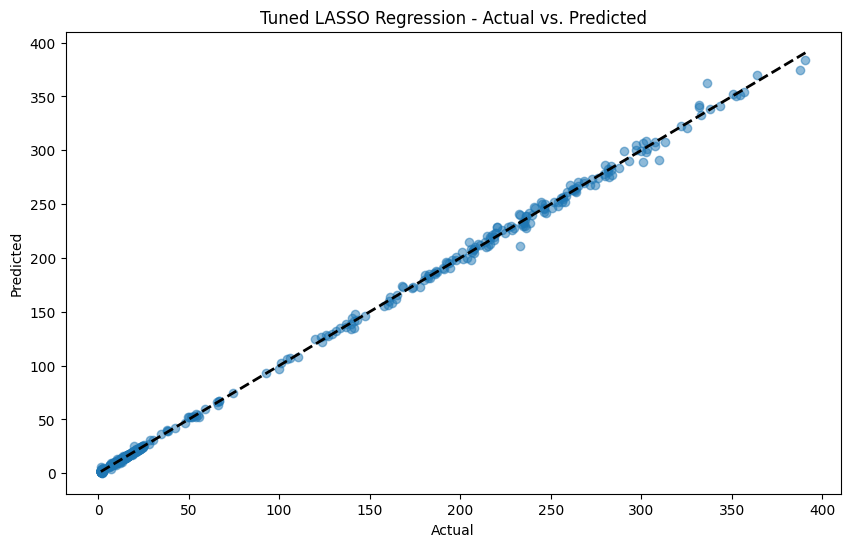

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_lasso, alpha=0.5)
plt.title('Tuned LASSO Regression - Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

## Extreme Gradient Boosting (XGBoost) Regressors

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameters to tune
param_grid_xgb = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.1, 0.2, 0.3],
    "subsample": [0.7, 0.8, 0.9, 1],
    "colsample_bytree": [0.7, 0.8, 0.9, 1]
}

# Create the Randomized Search object
random_search_xgb = RandomizedSearchCV(
    estimator=xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    param_distributions=param_grid_xgb,
    n_iter=10,  # Number of parameter settings sampled
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the random search to the data
random_search_xgb.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", random_search_xgb.best_params_)

# Best model
best_xgb_model = random_search_xgb.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters found:  {'subsample': 0.7, 'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 1}


In [ ]:
y_pred_best_xgb = best_xgb_model.predict(X_test)
rmse_best_xgb = np.sqrt(mean_squared_error(y_test, y_pred_best_xgb))
print(f'Tuned XGBoost Regression RMSE: {rmse_best_xgb}')

Tuned XGBoost Regression RMSE: 1.7311977348345764



### Plot Actual and Predicted

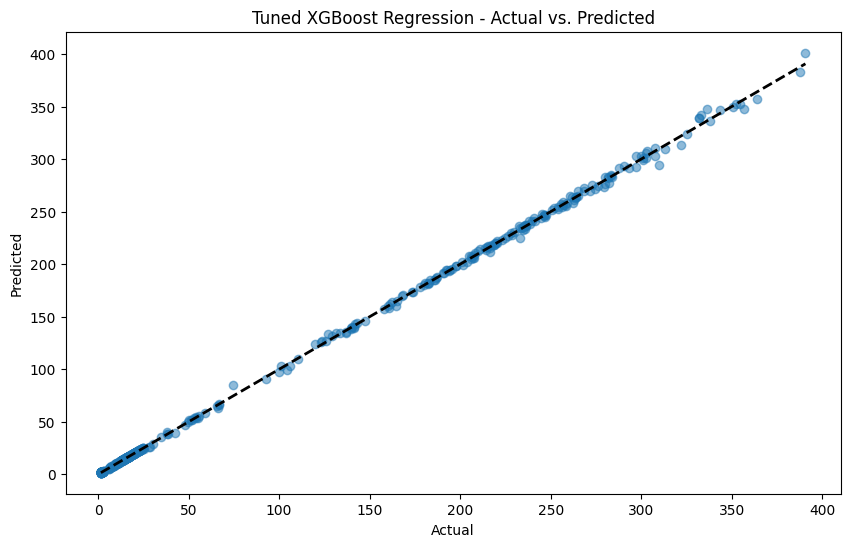

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_xgb, alpha=0.5)
plt.title('Tuned XGBoost Regression - Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

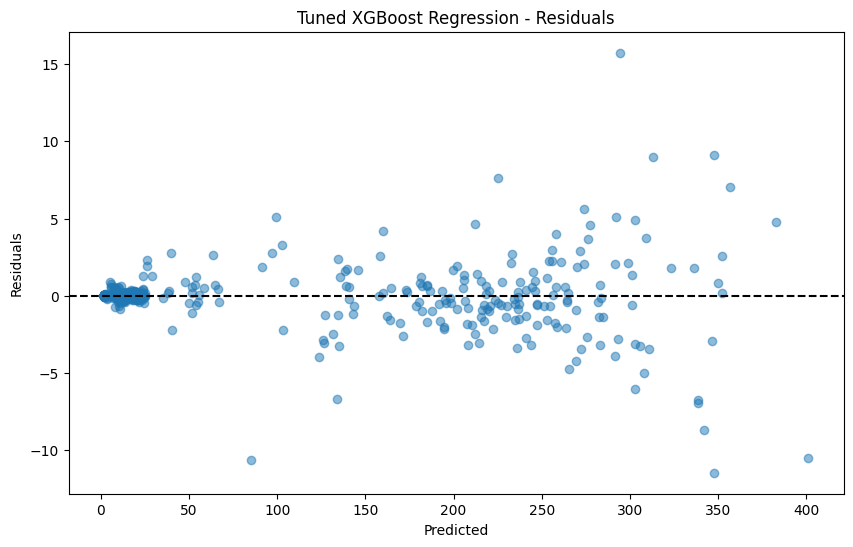

In [ ]:
residuals_best_xgb = y_test - y_pred_best_xgb

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_best_xgb, residuals_best_xgb, alpha=0.5)
plt.title('Tuned XGBoost Regression - Residuals')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='k', linestyle='--')
plt.show()

## Conclusion

In [ ]:
print("XGB RMSE:", rmse_best_xgb)
print("LASSO RMSE:", rmse_best_lasso)
print("Ridge Regression RMSE:", rmse_best_ridge)
print("Random Forest Regression RMSE:", rmse)

XGB RMSE: 1.7311977348345764
LASSO RMSE: 2.679694189533512
Ridge Regression RMSE: 1.7144318378140322
Random Forest Regression RMSE: 2.1152895548092325


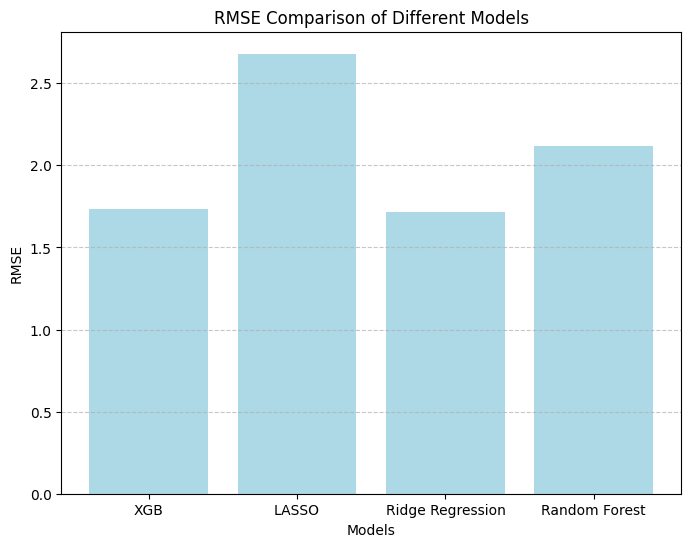

In [ ]:
models = ['XGB', 'LASSO', 'Ridge Regression', 'Random Forest']
rmse_values = [rmse_best_xgb, rmse_best_lasso, rmse_best_ridge, rmse]

plt.figure(figsize=(8, 6))
plt.bar(models, rmse_values, color='lightblue')
plt.title('RMSE Comparison of Different Models')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Benchmark Studies

using GARCH or Kalman Filter

## Kalman Filter

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
# from pandas_datareader import DataReader
from datetime import datetime
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
def Kalman_Filter(param,*args):
 S = Y.shape[0]
 S = S + 1
 "Initialize Params:"
 Z = param[0]
 T = param[1]
 H = param[2]
 Q = param[3]
 "Kalman Filter Starts:"
 u_predict = np.zeros(S)
 u_update = np.zeros(S)
 P_predict = np.zeros(S)
 P_update = np.zeros(S)
 v = np.zeros(S)
 F = np.zeros(S)
 KF_Dens = np.zeros(S)
 for s in range(1,S):
  if s == 1:
    P_update[s] = 900
    P_predict[s] =  T*P_update[1]*np.transpose(T)+Q
  else:
    F[s] = Z*P_predict[s-1]*np.transpose(Z)+H
    v[s]=Y[s-1]-Z*u_predict[s-1]
    u_update[s] = u_predict[s-1]+P_predict[s-1]*np.transpose(Z)*(1/F[s])*v[s]
    u_predict[s] = T*u_update[s]
    P_update[s] = P_predict[s-1]-P_predict[s-1]*np.transpose(Z)*(1/F[s])*Z*P_predict[s-1]
    P_predict[s] = T*P_update[s]*np.transpose(T)+Q
    KF_Dens[s] = (1/2)*np.log(2*np.pi)+(1/2)*np.log(abs(F[s]))+(1/2)*np.transpose(v[s])*(1/F[s])*v[s]

    Likelihood = sum(KF_Dens[1:-1]) # a loss function

    return Likelihood

In [ ]:
def Kalman_Smoother(params, Y, *args):
 S = Y.shape[0]
 S = S + 1
 "Initialize Params:"
 Z = params[0]
 T = params[1]
 H = params[2]
 Q = params[3]

 "Kalman Filter Starts:"
 u_predict = np.zeros(S)
 u_update = np.zeros(S)
 P_predict = np.zeros(S)
 P_update = np.zeros(S)
 v = np.zeros(S)
 F = np.zeros(S)
 for s in range(1,S):
   if s == 1:
    P_update[s] = 900
    P_predict[s] =  T*P_update[1]*np.transpose(T)+Q
   else:
    F[s] = Z*P_predict[s-1]*np.transpose(Z)+H
    v[s]=Y[s-1]-Z*u_predict[s-1]
    u_update[s] = u_predict[s-1]+P_predict[s-1]*np.transpose(Z)*(1/F[s])*v[s]
    u_predict[s] = T*u_update[s];
    P_update[s] = P_predict[s-1]-P_predict[s-1]*np.transpose(Z)*(1/F[s])*Z*P_predict[s-1];
    P_predict[s] = T*P_update[s]*np.transpose(T)+Q

    u_smooth = np.zeros(S)
    P_smooth = np.zeros(S)
    u_smooth[S-1] = u_update[S-1]
    P_smooth[S-1] = P_update[S-1]
 for  t in range(S-1,0,-1):
        u_smooth[t-1] = u_update[t] + P_update[t]*np.transpose(T)/P_predict[t]*(u_smooth[t]-T*u_update[t])
        P_smooth[t-1] = P_update[t] + P_update[t]*np.transpose(T)/P_predict[t]*(P_smooth[t]-P_predict[t])/P_predict[t]*T*P_update[t]
 u_smooth = u_smooth[1:-1]
 return u_smooth



[*********************100%%**********************]  1 of 1 completed
Optimization terminated successfully.
         Current function value: 6.151974
         Iterations: 5
         Function evaluations: 50
         Gradient evaluations: 10
RMSE values is: $ 7.0569660625151345


<ipython-input-215-744d673d7860>:9: OptimizeWarning: Unknown solver options: xtol
  param_star = minimize(Kalman_Filter, param0, method='BFGS', options={'xtol': 1e-8, 'disp': True})


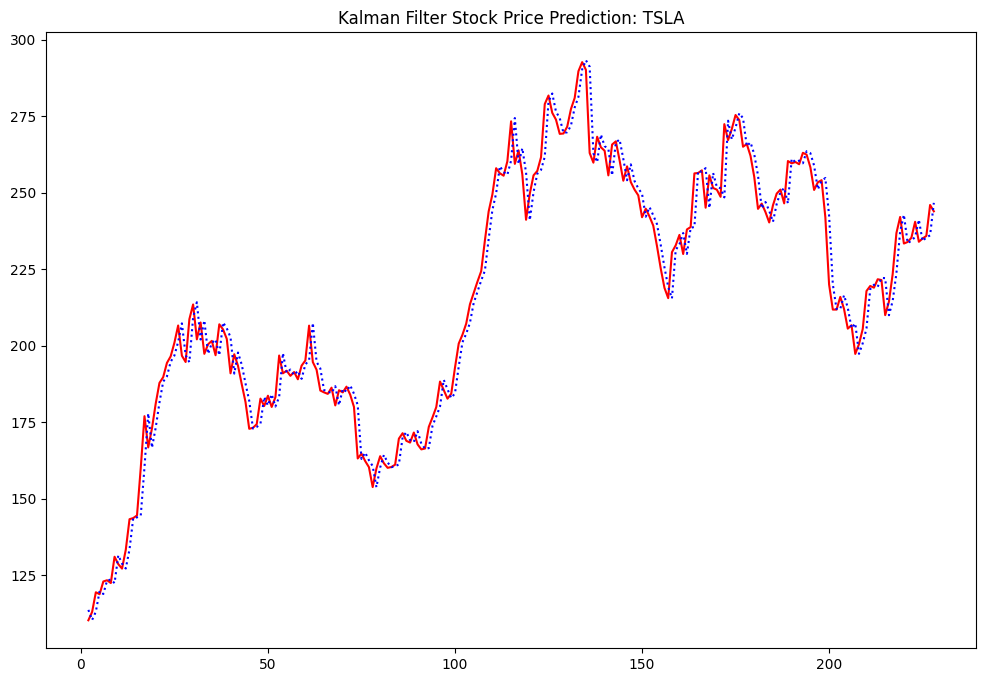

<Figure size 1000x600 with 0 Axes>

In [ ]:
start_date = datetime(2023,1,1)
end_date = datetime(2023,11,30)
TSLA = yf.download('TSLA',start_date ,end_date)
Y = TSLA['Adj Close'].values
# Y = np.diff(np.log(NVDA['Adj Close'].values))
T = Y.size;
# param0 = np.array([0.4, 1.35, 120*np.std(Y), 90*np.std(Y)])
param0 = np.array([2, 2.6, 2*np.std(Y), 200*np.std(Y)])
param_star = minimize(Kalman_Filter, param0, method='BFGS', options={'xtol': 1e-8, 'disp': True})
u = Kalman_Smoother(param_star.x,Y)
timevec = np.linspace(2,T-1,T-2)
plt.title('Kalman Filter Stock Price Prediction: TSLA')
plt.plot(timevec, u[1:],'r',timevec, Y[1:-1],'b:')
plt.figure(figsize=(10, 6))

RMSE = np.sqrt(np.mean((u[1:] - Y[1:-1])**2))
print('RMSE values is: $', RMSE)

## GARCH

In [ ]:
import pandas as pd
import numpy as np
import scipy.special as ss
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf

In [ ]:
def GARCH_t(Y):
 "Initialize Params:"
 mu = param0[0]
 omega = param0[1]
 alpha = param0[2]
 beta = param0[3]
 nv = param0[4]

 T = Y.shape[0]
 GARCH_t = np.zeros(T)
 sigma2 = np.zeros(T)
 F = np.zeros(T)
 v = np.zeros(T)
 for t in range(1,T):
    sigma2[t] = omega + alpha*((Y[t-1]-mu)**2)+beta*(sigma2[t-1]);
    F[t] = Y[t] - mu-np.sqrt(sigma2[t])*np.random.standard_t(nv,1)
    v[t] = sigma2[t]
    GARCH_t[t] = np.log(ss.gamma((nv+1)/2))-np.log(np.sqrt(nv*np.pi))-\
                    np.log(ss.gamma(nv/2))-((nv+1)/2)*np.log(1+((F[t]**2)/v[t])/nv)

 Likelihood = np.sum(GARCH_t[1:-1])
 return Likelihood


def GARCH_PROD_t(params, Y0, T):
 mu = params[0]
 omega = params[1]
 alpha = params[2]
 beta = params[3]
 nv = params[4]
 Y = np.zeros(T)
 sigma2 = np.zeros(T)
 Y[0] = Y0
 sigma2[0] = 0.0001
 for t in range(1,T):
    sigma2[t] = omega + alpha*((Y[t-1]-mu)**2)+beta*(sigma2[t-1]);
    Y[t] = mu+np.sqrt(sigma2[t])*np.random.standard_t(nv,1)
 return Y




[*********************100%%**********************]  1 of 1 completed
         Current function value: -29.257146
         Iterations: 1
         Function evaluations: 154
         Gradient evaluations: 24
RMSE values is: 0.03845591752387081


<ipython-input-218-60a4399ce7e3>:8: OptimizeWarning: Unknown solver options: xtol
  param_star = minimize(GARCH_t, param0, method='BFGS', options={'xtol': 1e-8, 'disp': True})
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


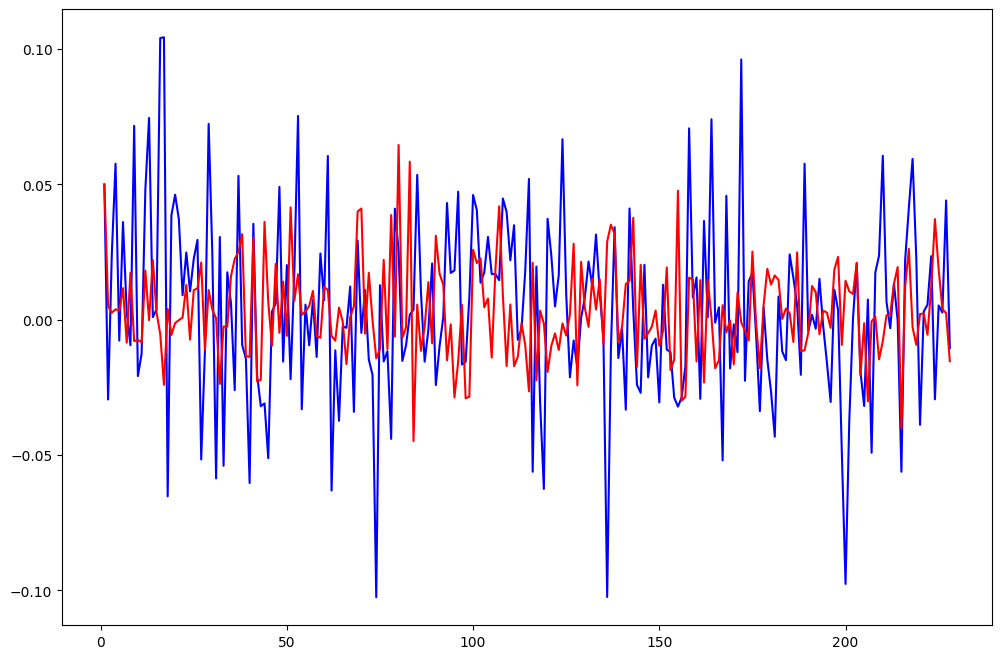

In [ ]:
TSLA = yf.download('TSLA', datetime(2023,1,1), datetime(2023,11,30))
# Y = TSLA['Adj Close'].values
Y = np.diff(np.log(TSLA['Adj Close'].values))
T = Y.shape[0]

param0 = np.array([np.mean(Y), np.var(Y)/10, 0.3, 0.3, 10])
# param0 = np.array([np.mean(Y), np.var(Y)/5, 0.5, 0.2, 10])
param_star = minimize(GARCH_t, param0, method='BFGS', options={'xtol': 1e-8, 'disp': True})
Y_GARCH_t = GARCH_PROD_t(param_star.x, Y[0], T)
timevec = np.linspace(1,T,T)
plt.plot(timevec, Y,'b',timevec, Y_GARCH_t,'r')

RMSE = np.sqrt(np.mean((Y_GARCH_t - Y)**2))
print('RMSE values is:', RMSE)